<a href="https://colab.research.google.com/github/Sepideap/Fraud-Detection-in-Car-Insurance-/blob/main/Sepi_copy2_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1.   Data Import
2.   Exploratory Data Analysis






# Data Import

In [1]:
# importing all the python libraries we will use
import pathlib
import matplotlib.pyplot as plt
from google.colab import drive
import pandas as pd
import seaborn as sns
import numpy as np

url = 'https://raw.githubusercontent.com/YanaGilBCN/dspt11-YanaSepi-FinalProject/f98c89d6cf865d6e681093245eec0496013f7347/fraud_oracle.csv'
df_fraud = pd.read_csv(url)
df_fraud_backup = df_fraud.copy()

### Exploratory Data Analysis ###


* Number of variables
* Data types
* Class distribution of the variables
* Data quality check
* Feature engineering





In [2]:
# size of the dataset
df_fraud.shape

(15420, 33)

In [3]:
df_fraud.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [4]:
head_of_column = df_fraud['RepNumber'].head()
print(head_of_column)

0    12
1    15
2     7
3     4
4     3
Name: RepNumber, dtype: int64


In [5]:
df_fraud['RepNumber'].unique()

array([12, 15,  7,  4,  3, 14,  1, 13, 11, 16,  6,  2,  8,  5,  9, 10])

In [6]:
# first look at the data
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [7]:
# variable type breakdown and count
df_fraud.dtypes.value_counts()

object    24
int64      9
dtype: int64

In [8]:
# we have 33 variables: 24 categorical and 9 numerical

# list of categorical variables
df_fraud.columns[df_fraud.dtypes == 'object']

Index(['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'BasePolicy'],
      dtype='object')

In [9]:
# list of numerical variables
df_fraud.columns[df_fraud.dtypes == 'int64']

Index(['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'FraudFound_P',
       'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating', 'Year'],
      dtype='object')

In [10]:
# Now, let's take a look at the target variable, FraudFound_P
# Lets see the breakdown of classes for FraudFound_P

fraud_cases = pd.DataFrame(df_fraud['FraudFound_P'].value_counts())
fraud_cases['Percentage'] = round(df_fraud['FraudFound_P'].value_counts(normalize=True) * 100, 2)
fraud_cases = fraud_cases.rename(columns={'FraudFound_P': 'Claims'})
fraud_cases

,Claims,Percentage
0,14497,94.01
1,923,5.99


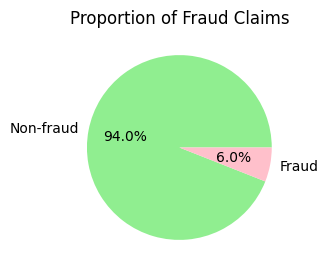

In [11]:
# Lets make a pie chart to vizualize this imbalance:

import matplotlib.pyplot as plt

# Proportion of fraud claims
fig, ax = plt.subplots(figsize=(4, 3))
fraud_proportion = df_fraud['FraudFound_P'].value_counts(normalize=True)
fraud_proportion.plot.pie(labels=['Non-fraud', 'Fraud'], autopct='%1.1f%%', ax=ax, colors=['lightgreen', 'pink'])  # Specify the axis using ax=ax

# Remove y-axis label
ax.set_ylabel('')

plt.title('Proportion of Fraud Claims')
plt.show()

## Overview of the variables

#### Number of variables

In total, there are 33 variables:
- 32 input variables
- 1 Output Variable

#### Data Types

- Numeric (int64) - 9
- Binary (Object) - 24

#### Target Variable
-  `FraudFound_P`
- Numeric
- Binary (0/1)
- Class Distribution: imbalanced (6% Fraud vs 94% Non-fraud)

**IMPORTANT:** The dataset is imbalanced. There are 5.99% fraud cases vs 94.01% non-fraud ones. In absolute numbers, we have 923 fraud cases vs 14,497 non-fraud cases. To deal with the imbalance, we will try some balancing technique:  'oversampling' of the minority class (fraud) or 'undersampling' of the majority class (no fraud) or both at the same time

In [12]:
# As seen above, only the Age variable appears to be a true numeric variable. All others can  be converted into object/categorical variables.
# Let's take a closer look at Age variable

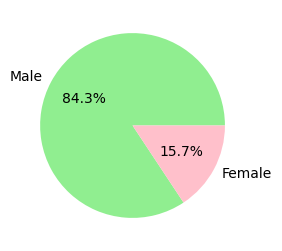

In [13]:
Sex = df_fraud['Sex'].value_counts()
fig, ax = plt.subplots(figsize=(4, 3))
labels = ['Male', 'Female']
ax.pie(Sex, labels=labels, autopct='%1.1f%%', colors=['lightgreen', 'pink'])
plt.show()


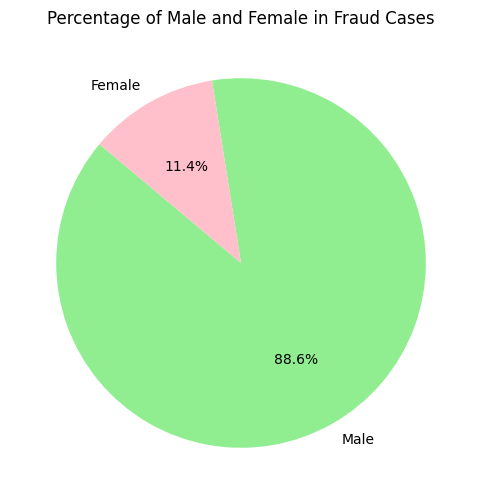

In [14]:
# Filter to include only fraud cases
fraud_cases = df_fraud[df_fraud['FraudFound_P'] == 1]

# Get value counts for the 'Sex' column in fraud cases
sex_distribution = fraud_cases['Sex'].value_counts()

# Pie chart
fig, ax = plt.subplots(figsize=(6, 6))
labels = sex_distribution.index
colors = ['lightgreen', 'pink']
ax.pie(sex_distribution, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
ax.set_title('Percentage of Male and Female in Fraud Cases')
plt.show()


In [15]:
df_fraud['Age'].describe()

count    15420.000000
mean        39.855707
std         13.492377
min          0.000000
25%         31.000000
50%         38.000000
75%         48.000000
max         80.000000
Name: Age, dtype: float64

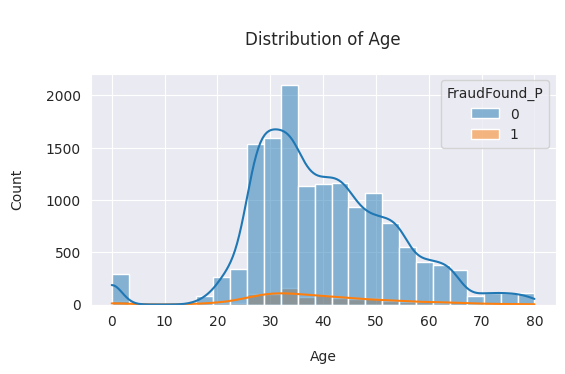

In [16]:
# The minimum value of A is 0 which does not seem correct so lets take a closer look at it and see its distribution

# Plot the distribution:
plt.figure(figsize=(6, 3))
sns.set_style('darkgrid')
sns.histplot(data=df_fraud, x='Age', color='teal', kde=True, bins=25, hue='FraudFound_P')
plt.title('\nDistribution of Age\n')
plt.xlabel('\nAge')
plt.ylabel('Count\n')
plt.show()

In [17]:
# So how many data points are there with Age == 0
df_fraud[df_fraud['Age'] == 0][['Age', 'FraudFound_P']].value_counts()


Age  FraudFound_P
0    0               289
     1                31
dtype: int64

In [18]:
# We have a total of 320 cases where Age = 0. 31 of them are Fraud vases vs 289 non-Fraud cases.
# Need to replace Age values that are currently 0. First replace them with NaN, than impute with median for Age for FraudFound_P == 0:

df_fraud['Age'] = df_fraud['Age'].replace(0, float('nan'))

# Calculate the median of 'Age' for non-fraudulent cases
median_age_non_fraud = df_fraud[df_fraud['FraudFound_P'] == 0]['Age'].median()

# Fill NaN values in 'Age' with the calculated median
df_fraud['Age'].fillna(median_age_non_fraud, inplace=True)


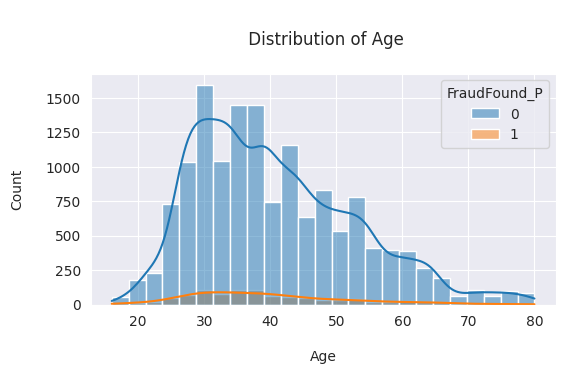

In [19]:
# Replot the distribution:
plt.figure(figsize=(6, 3))
sns.set_style('darkgrid')
sns.histplot(data=df_fraud, x='Age', color='teal', kde=True, bins=25, hue='FraudFound_P')
plt.title('\n Distribution of Age\n')
plt.xlabel('\nAge')
plt.ylabel('Count\n')
plt.show()

In [20]:
# recoding Age into Age_Bracket. We will assume AgeOfPolicyHolder is a different variable
bins = [16, 18, 21, 26, 31, 36, 41, 51, 66, 100]
labels = ['16 to 17', '18 to 20', '21 to 25', '26 to 30', '31 to 35', '36 to 40', '41 to 50', '51 to 65', 'over 65']

df_fraud['Age_Bracket'] = pd.cut(df_fraud['Age'], bins=bins, labels=labels, right=False)
df_fraud['Age_Bracket'] = df_fraud['Age_Bracket'].astype('object')


In [21]:
df_fraud[['Age', 'AgeOfPolicyHolder', 'Age_Bracket']].head(10)

,Age,AgeOfPolicyHolder,Age_Bracket
0,21.0,26 to 30,21 to 25
1,34.0,31 to 35,31 to 35
2,47.0,41 to 50,41 to 50
3,65.0,51 to 65,51 to 65
4,27.0,31 to 35,26 to 30
5,20.0,21 to 25,18 to 20
6,36.0,36 to 40,36 to 40
7,39.0,16 to 17,36 to 40
8,30.0,31 to 35,26 to 30
9,42.0,36 to 40,41 to 50


In [22]:
# exploring similar columns ['BasePolicy','PolicyType', 'VehicleCategory']

df_fraud[df_fraud['VehicleCategory'] == 'Sport'][['VehicleCategory', 'BasePolicy', 'PolicyType']]



,VehicleCategory,BasePolicy,PolicyType
0,Sport,Liability,Sport - Liability
1,Sport,Collision,Sport - Collision
2,Sport,Collision,Sport - Collision
3,Sport,Liability,Sedan - Liability
4,Sport,Collision,Sport - Collision
...,...,...,...
15402,Sport,Liability,Sedan - Liability
15407,Sport,Liability,Sedan - Liability
15412,Sport,Liability,Sedan - Liability
15413,Sport,Liability,Sedan - Liability


In [23]:
# creating a new variable that is a combo of VehicleCategory' and 'BasePolicy'
# we are assuming its actually different from 'PolicyType' so we are keeping that one too

df_fraud['VehicleCategory_BasePolicy'] = df_fraud['VehicleCategory'] + ' - ' + df_fraud['BasePolicy']

In [24]:
# dropping the old ''PolicyType':
#df_fraud['PolicyType_New'] = df_fraud['VehicleCategory'] + ' - ' + df_fraud['BasePolicy']
#df_fraud = df_fraud.drop(['PolicyType'], axis = 1)

In [25]:
# dropping other irrelevant columns
df_fraud = df_fraud.drop(['PolicyNumber'], axis = 1)
 #'DayOfWeekClaimed', 'MonthClaimed', 'Year', 'AgeOfPolicyHolder', 'Month', 'WeekOfMonth', 'WeekOfMonthClaimed',


In [26]:
df_fraud.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Age_Bracket,VehicleCategory_BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,No,No,External,none,1 year,3 to 4,1994,Liability,21 to 25,Sport - Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,Yes,No,External,none,no change,1 vehicle,1994,Collision,31 to 35,Sport - Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,No,No,External,none,no change,1 vehicle,1994,Collision,41 to 50,Sport - Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,51 to 65,Sport - Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,No,No,External,none,no change,1 vehicle,1994,Collision,26 to 30,Sport - Collision


In [27]:
# converting numerical to categorical varialbes. Leaving FraudFound_P as is.
df_fraud[['Deductible', 'DriverRating', 'WeekOfMonth', 'WeekOfMonthClaimed', 'Year', 'RepNumber']] = \
df_fraud[['Deductible', 'DriverRating', 'WeekOfMonth', 'WeekOfMonthClaimed', 'Year', 'RepNumber']].astype(str)


In [28]:
df_fraud.select_dtypes(include='int64').head(5)

,FraudFound_P
0,0
1,0
2,0
3,0
4,0


In [29]:
df_fraud.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'RepNumber', 'Deductible',
       'DriverRating', 'Days_Policy_Accident', 'Days_Policy_Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'Age_Bracket', 'VehicleCategory_BasePolicy'],
      dtype='object')

Month  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
  Mar             1    102                 7.50                            11.05
  Aug             1     84                 7.45                             9.10
  May             1     94                 6.88                            10.18
  Feb             1     82                 6.48                             8.88
  Apr             1     80                 6.25                             8.67
  Jan             1     87                 6.17                             9.43
  Sep             1     76                 6.13                             8.23
  Jun             1     80                 6.06                             8.67
  Oct             1     70                 5.36                             7.58
  Dec             1     62                 4.82                             6.72
  Jul             1     60                 4.77                             6.50
  Nov             1     46  

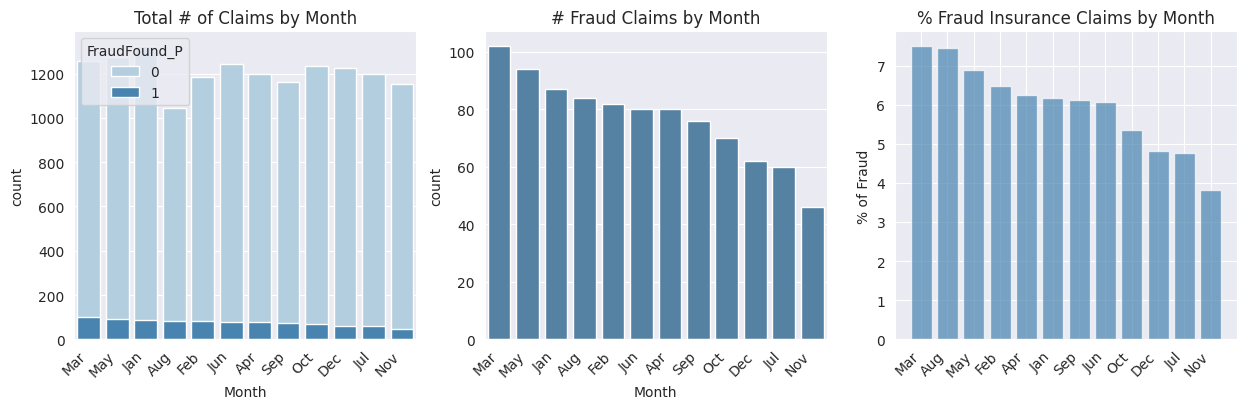

WeekOfMonth  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
          2             1    225                 6.32                            24.38
          1             1    200                 6.28                            21.67
          3             1    215                 5.91                            23.29
          4             1    192                 5.65                            20.80
          5             1     91                 5.56                             9.86
          5             0   1546                94.44                              NaN
          4             0   3206                94.35                              NaN
          3             0   3425                94.09                              NaN
          1             0   2987                93.72                              NaN
          2             0   3333                93.68                              NaN


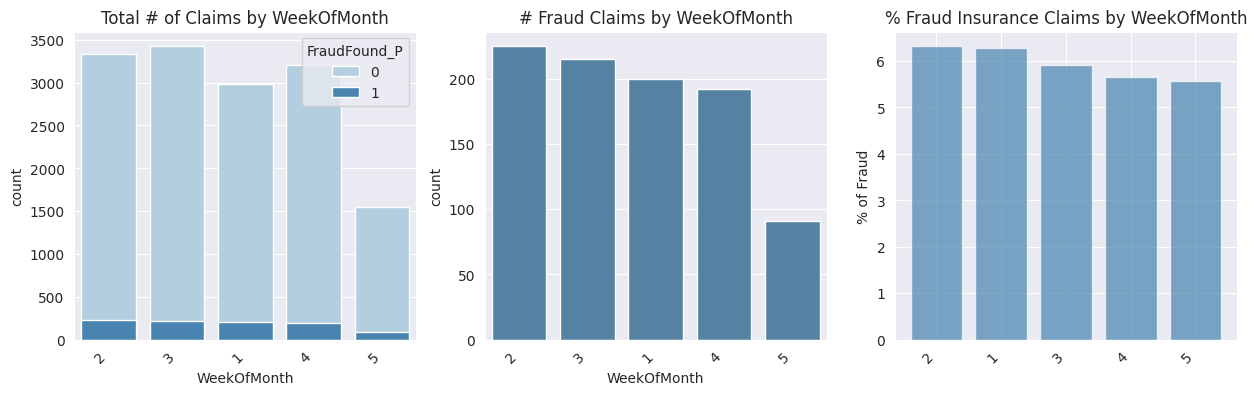

DayOfWeek  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
   Sunday             1    122                 6.99                            13.22
 Saturday             1    132                 6.66                            14.30
   Friday             1    154                 6.30                            16.68
   Monday             1    160                 6.12                            17.33
 Thursday             1    120                 5.52                            13.00
Wednesday             1    115                 5.33                            12.46
  Tuesday             1    120                 5.22                            13.00
  Tuesday             0   2180                94.78                              NaN
Wednesday             0   2044                94.67                              NaN
 Thursday             0   2053                94.48                              NaN
   Monday             0   2456                93.88              

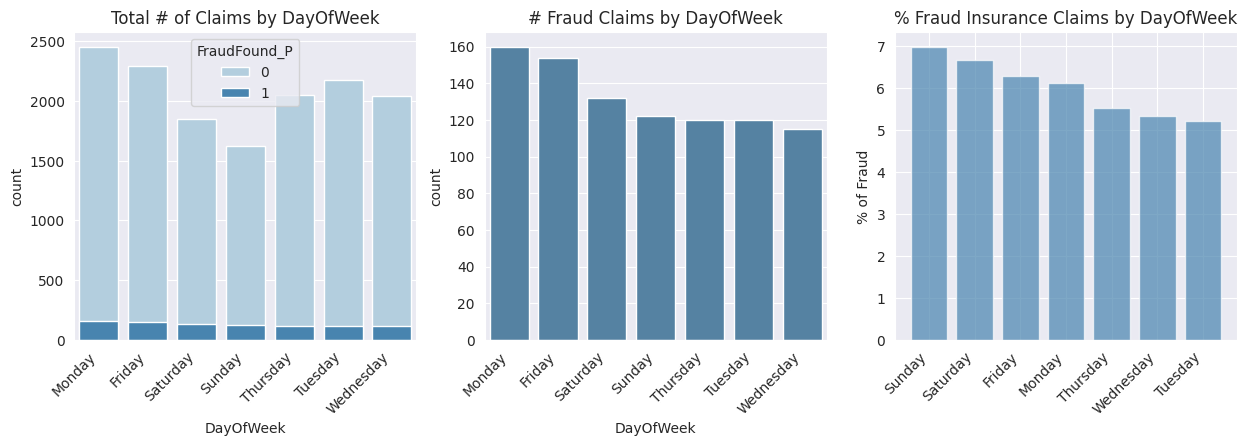

     Make  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
  Mecedes             1      1                25.00                             0.11
   Accura             1     59                12.50                             6.39
   Saturn             1      6                10.34                             0.65
     Saab             1     11                10.19                             1.19
     Ford             1     33                 7.33                             3.58
  Mercury             1      6                 7.23                             0.65
      BMW             1      1                 6.67                             0.11
    Honda             1    179                 6.39                            19.39
   Toyota             1    186                 5.96                            20.15
Chevrolet             1     94                 5.59                            10.18
  Pontiac             1    213                 5.55              

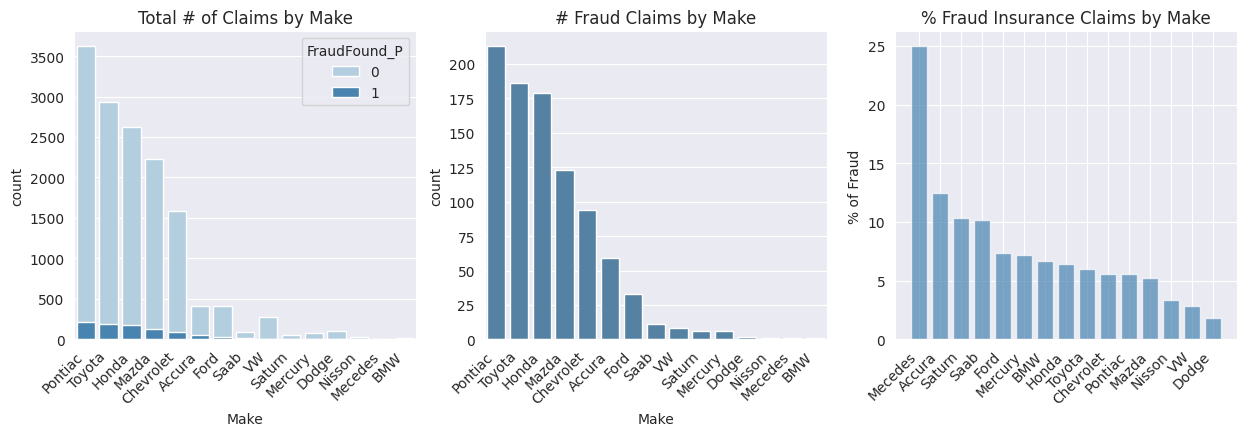

AccidentArea  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
       Rural             1    133                 8.32                            14.41
       Urban             1    790                 5.72                            85.59
       Urban             0  13032                94.28                              NaN
       Rural             0   1465                91.68                              NaN


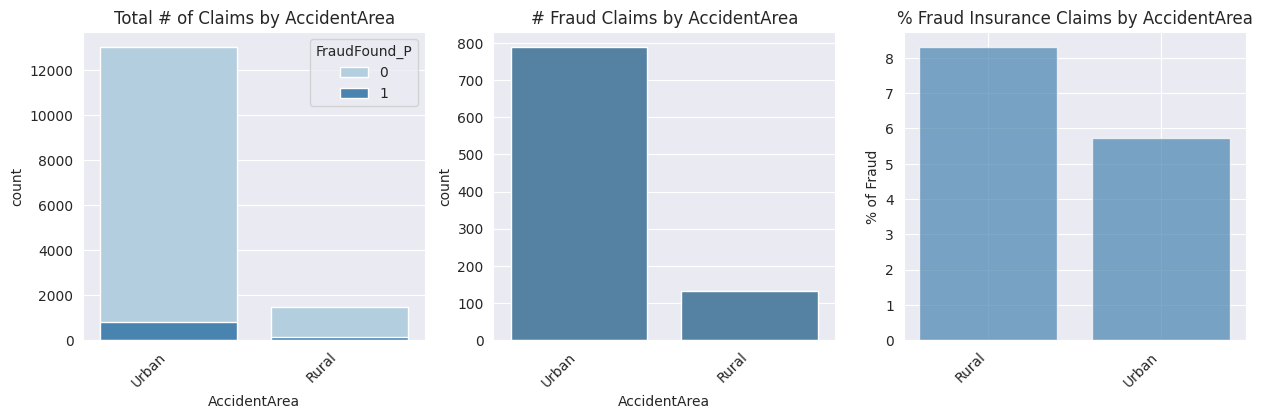

DayOfWeekClaimed  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
        Saturday             1     10                 7.87                             1.08
          Friday             1    164                 6.57                            17.77
       Wednesday             1    188                 6.37                            20.37
         Tuesday             1    198                 5.87                            21.45
          Sunday             1      3                 5.77                             0.33
          Monday             1    216                 5.75                            23.40
        Thursday             1    144                 5.41                            15.60
               0             0      1               100.00                              NaN
        Thursday             0   2516                94.59                              NaN
          Monday             0   3541                94.25                      

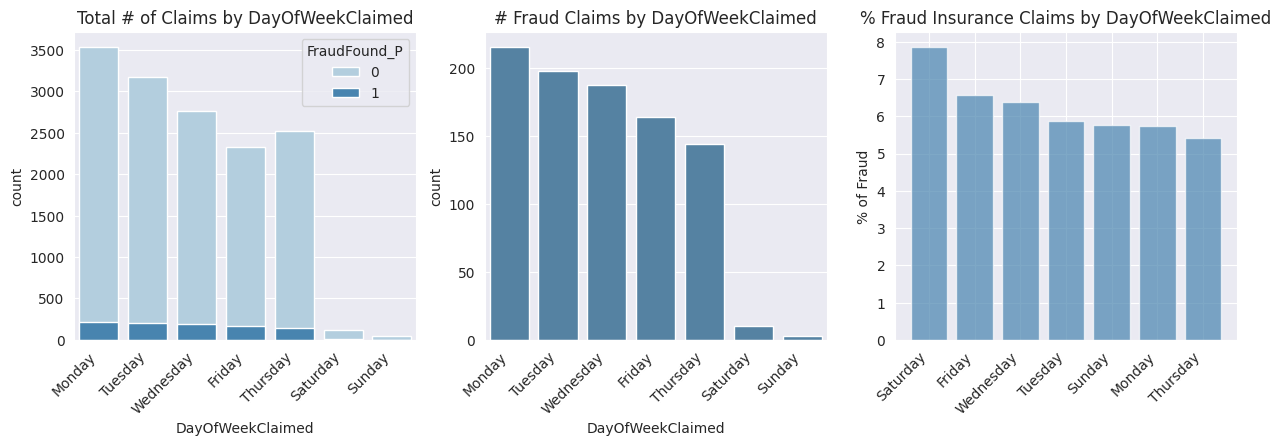

MonthClaimed  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
         Aug             1     92                 8.17                             9.97
         May             1    102                 7.23                            11.05
         Mar             1     97                 7.20                            10.51
         Apr             1     82                 6.45                             8.88
         Jan             1     92                 6.36                             9.97
         Sep             1     78                 6.28                             8.45
         Feb             1     78                 6.06                             8.45
         Jun             1     78                 6.03                             8.45
         Oct             1     73                 5.45                             7.91
         Jul             1     56                 4.57                             6.07
         Dec             1     4

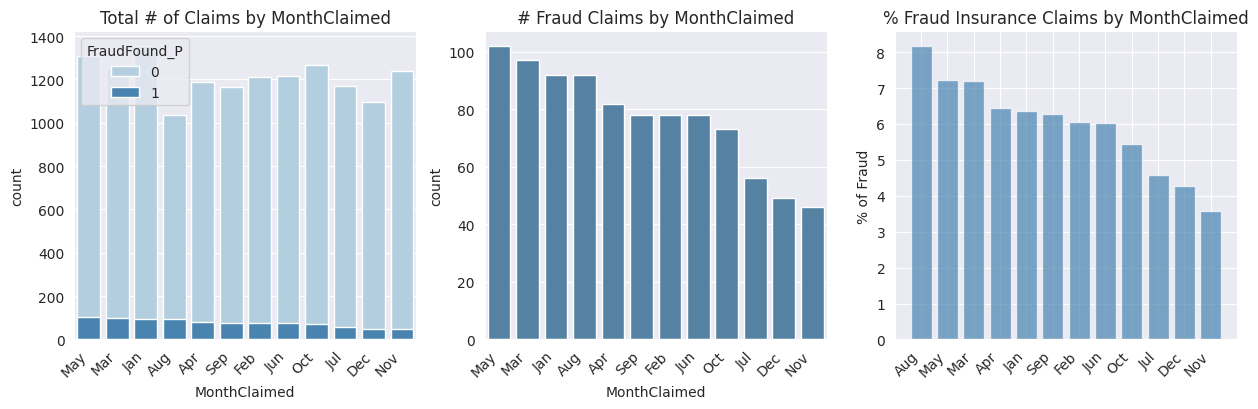

WeekOfMonthClaimed  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
                 1             1    220                 6.38                            23.84
                 3             1    221                 6.17                            23.94
                 4             1    209                 6.09                            22.64
                 2             1    208                 5.59                            22.54
                 5             1     65                 5.27                             7.04
                 5             0   1169                94.73                              NaN
                 2             0   3512                94.41                              NaN
                 4             0   3224                93.91                              NaN
                 3             0   3362                93.83                              NaN
                 1             0   3230                93.62

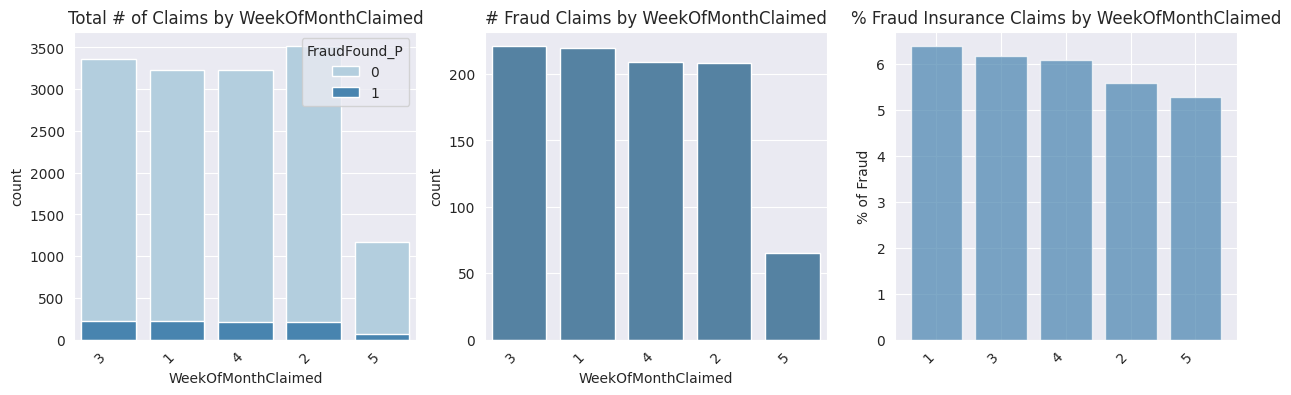

   Sex  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
  Male             1    818                 6.29                            88.62
Female             1    105                 4.34                            11.38
Female             0   2315                95.66                              NaN
  Male             0  12182                93.71                              NaN


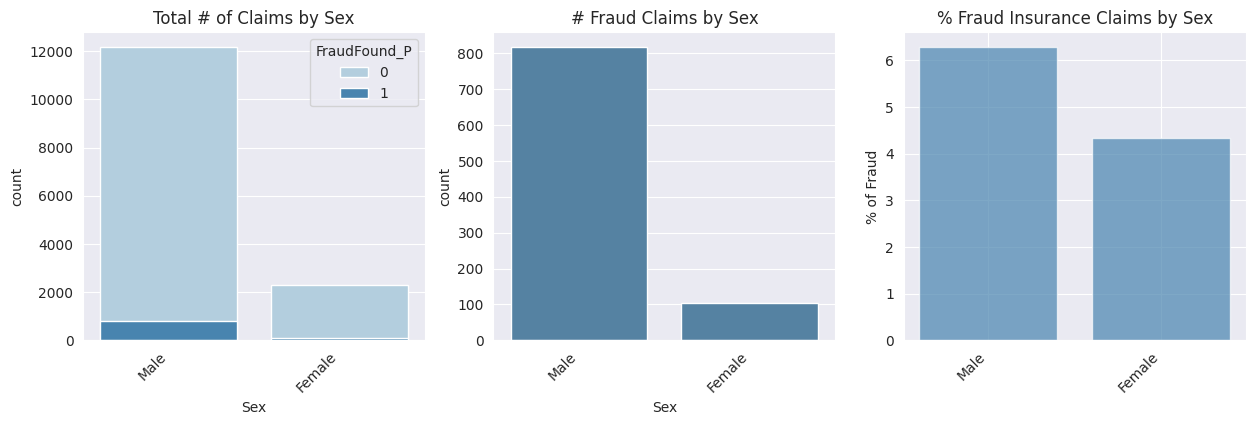

MaritalStatus  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
        Widow             1      3                 8.57                             0.33
      Married             1    639                 6.01                            69.23
       Single             1    278                 5.94                            30.12
     Divorced             1      3                 3.95                             0.33
     Divorced             0     73                96.05                              NaN
       Single             0   4406                94.06                              NaN
      Married             0   9986                93.99                              NaN
        Widow             0     32                91.43                              NaN


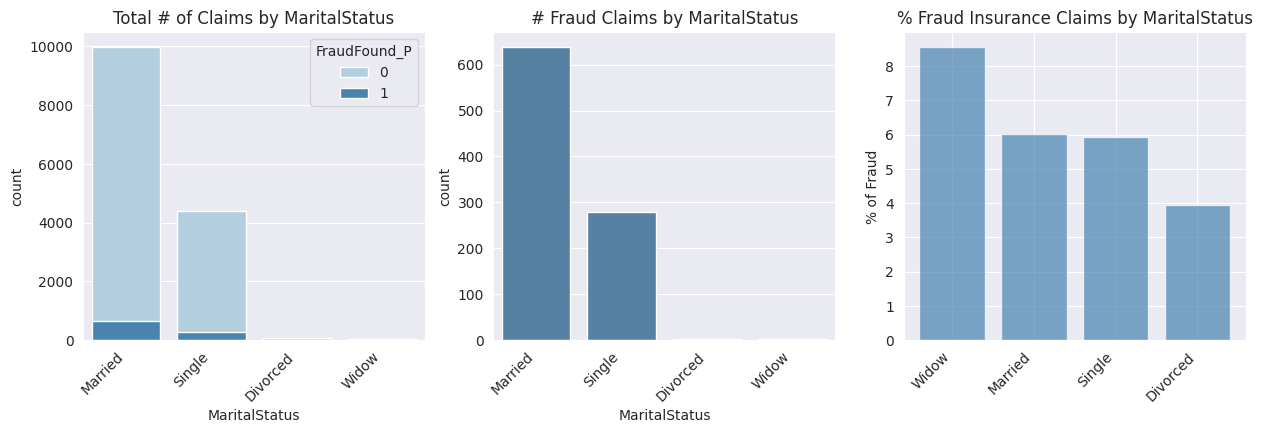

        Fault  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
Policy Holder             1    886                 7.89                            95.99
  Third Party             1     37                 0.88                             4.01
  Third Party             0   4153                99.12                              NaN
Policy Holder             0  10344                92.11                              NaN


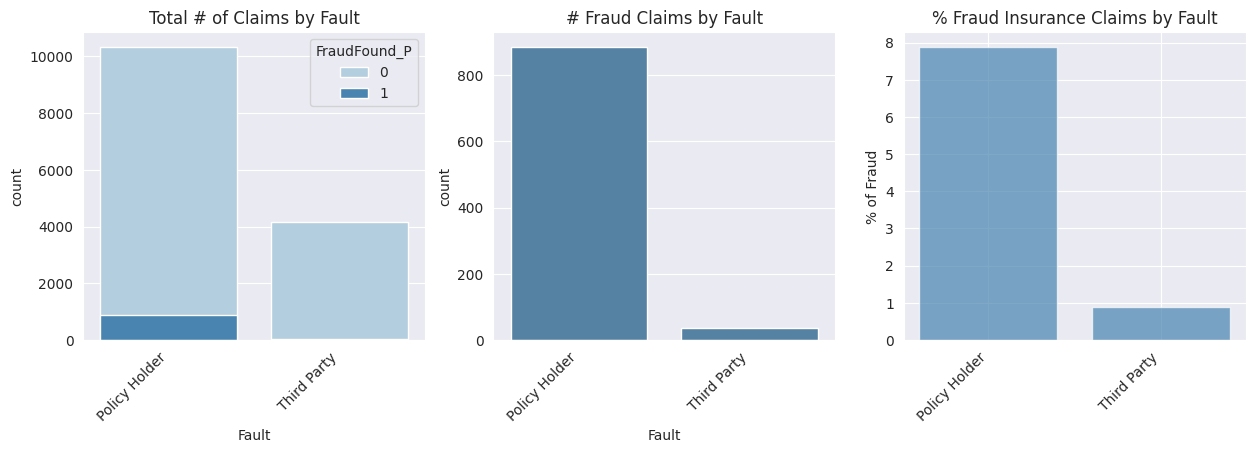

          PolicyType  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
   Sport - Collision             1     48                13.79                             5.20
Utility - All Perils             1     41                12.06                             4.44
  Sedan - All Perils             1    411                10.06                            44.53
 Utility - Collision             1      3                10.00                             0.33
   Sedan - Collision             1    384                 6.88                            41.60
   Sedan - Liability             1     36                 0.72                             3.90
  Sport - All Perils             0     22               100.00                              NaN
   Sport - Liability             0      1               100.00                              NaN
 Utility - Liability             0     21               100.00                              NaN
   Sedan - Liability             0   495

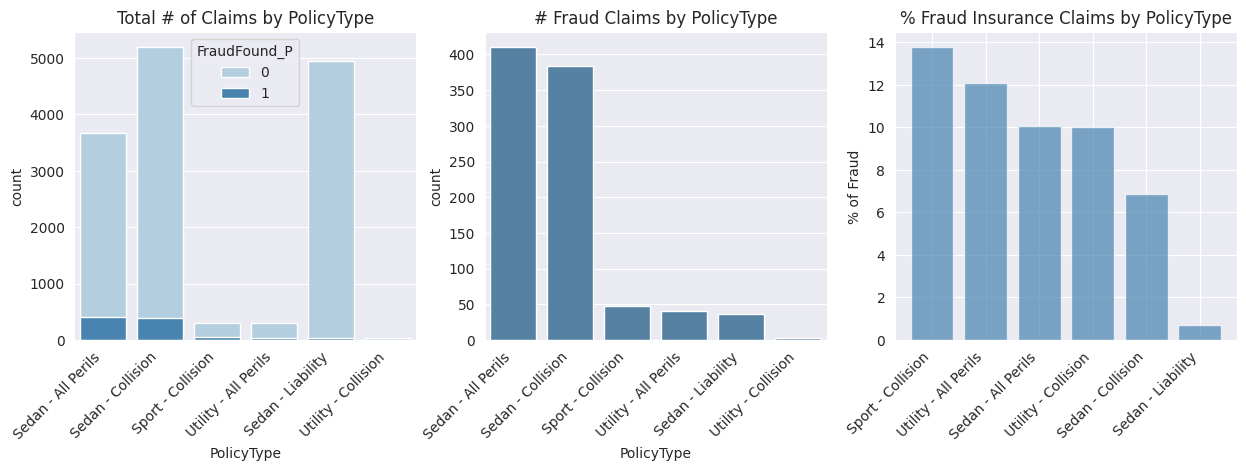

VehicleCategory  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
        Utility             1     44                11.25                             4.77
          Sedan             1    795                 8.22                            86.13
          Sport             1     84                 1.57                             9.10
          Sport             0   5274                98.43                              NaN
          Sedan             0   8876                91.78                              NaN
        Utility             0    347                88.75                              NaN


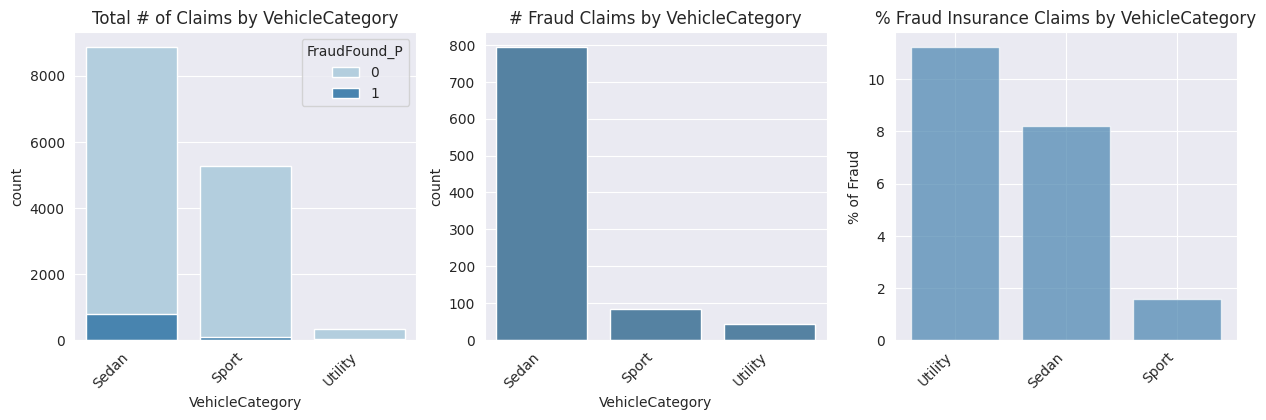

   VehiclePrice  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
less than 20000             1    103                 9.40                            11.16
more than 69000             1    189                 8.73                            20.48
 40000 to 59000             1     31                 6.72                             3.36
 20000 to 29000             1    421                 5.21                            45.61
 30000 to 39000             1    175                 4.95                            18.96
 60000 to 69000             1      4                 4.60                             0.43
 60000 to 69000             0     83                95.40                              NaN
 30000 to 39000             0   3358                95.05                              NaN
 20000 to 29000             0   7658                94.79                              NaN
 40000 to 59000             0    430                93.28                              NaN

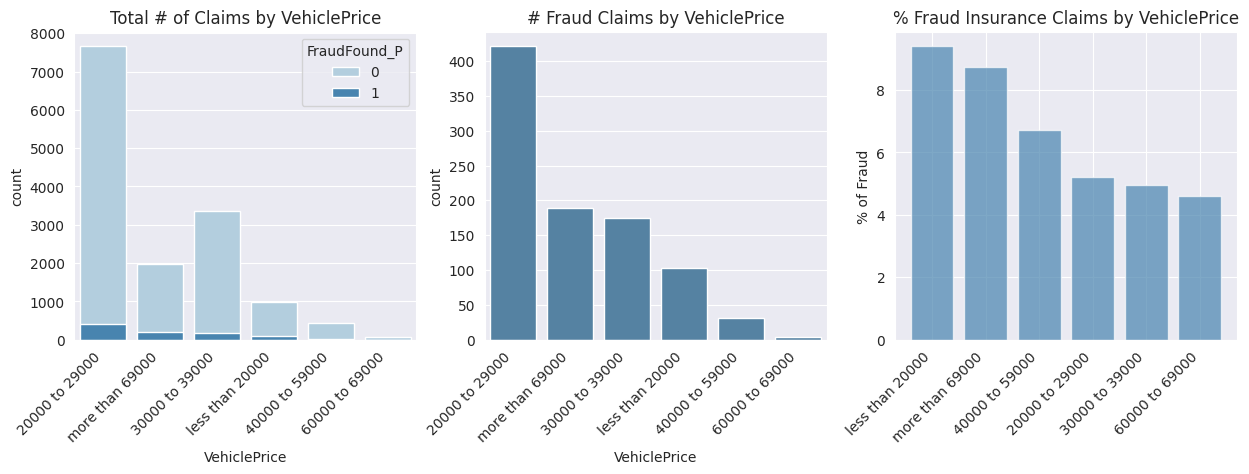

RepNumber  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
        6             1     66                 7.01                             7.15
        7             1     74                 6.92                             8.02
       10             1     66                 6.69                             7.15
        9             1     65                 6.51                             7.04
       13             1     58                 6.50                             6.28
        1             1     63                 6.38                             6.83
        3             1     60                 6.32                             6.50
       14             1     57                 6.06                             6.18
       11             1     56                 5.91                             6.07
        2             1     55                 5.75                             5.96
        8             1     52                 5.59              

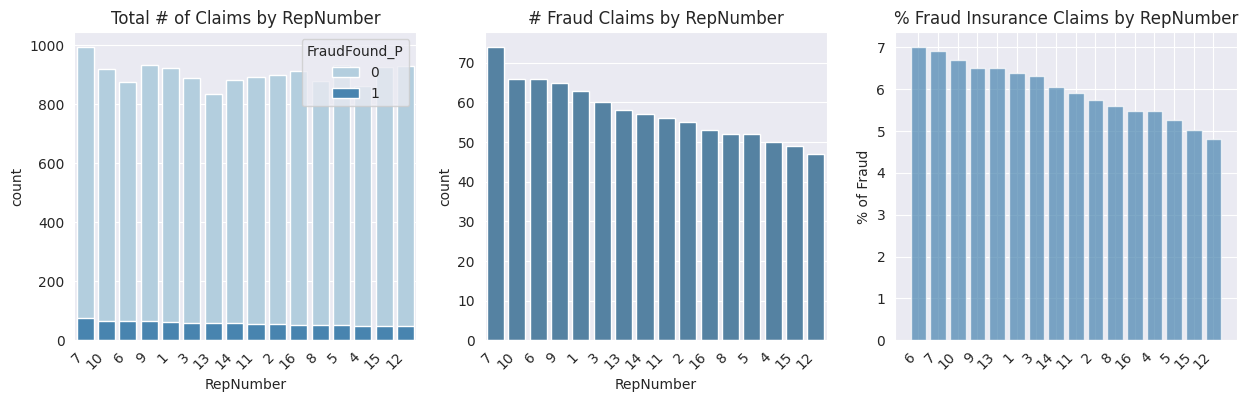

Deductible  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
       300             1      2                25.00                             0.22
       500             1     47                17.87                             5.09
       700             1     18                 5.79                             1.95
       400             1    856                 5.77                            92.74
       400             0  13982                94.23                              NaN
       700             0    293                94.21                              NaN
       500             0    216                82.13                              NaN
       300             0      6                75.00                              NaN


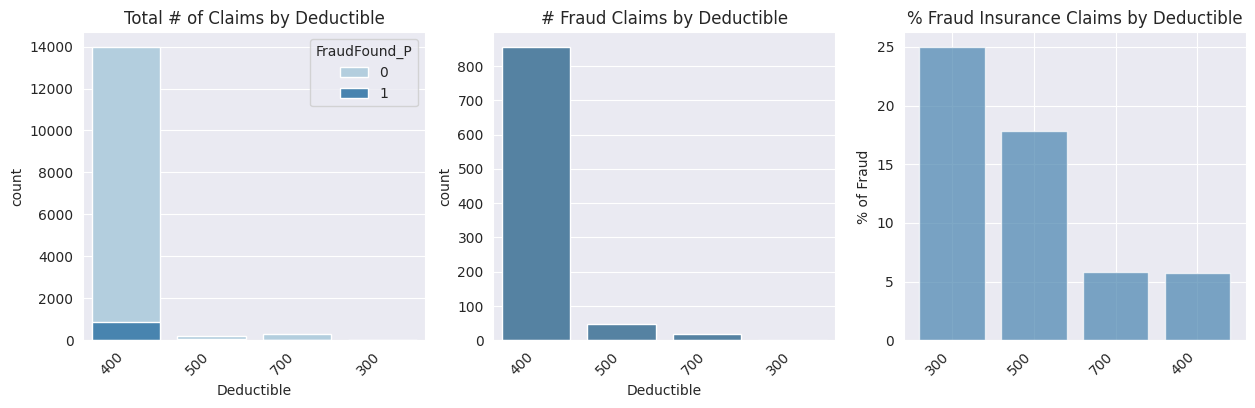

DriverRating  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
           3             1    242                 6.23                            26.22
           4             1    235                 6.20                            25.46
           1             1    232                 5.88                            25.14
           2             1    214                 5.63                            23.19
           2             0   3587                94.37                              NaN
           1             0   3712                94.12                              NaN
           4             0   3556                93.80                              NaN
           3             0   3642                93.77                              NaN


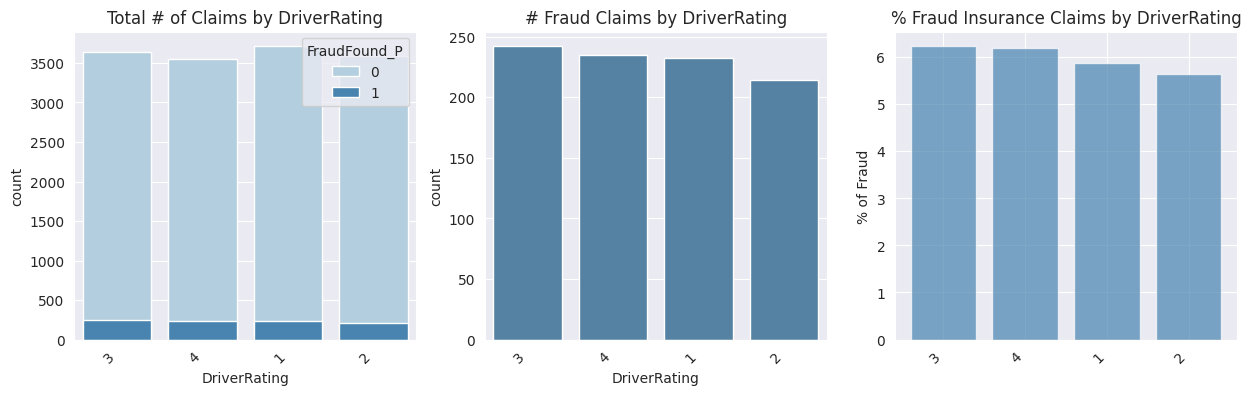

Days_Policy_Accident  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
                none             1      9                16.36                             0.98
             8 to 15             1      5                 9.09                             0.54
              1 to 7             1      1                 7.14                             0.11
            15 to 30             1      3                 6.12                             0.33
        more than 30             1    905                 5.94                            98.05
        more than 30             0  14342                94.06                              NaN
            15 to 30             0     46                93.88                              NaN
              1 to 7             0     13                92.86                              NaN
             8 to 15             0     50                90.91                              NaN
                none             0     4

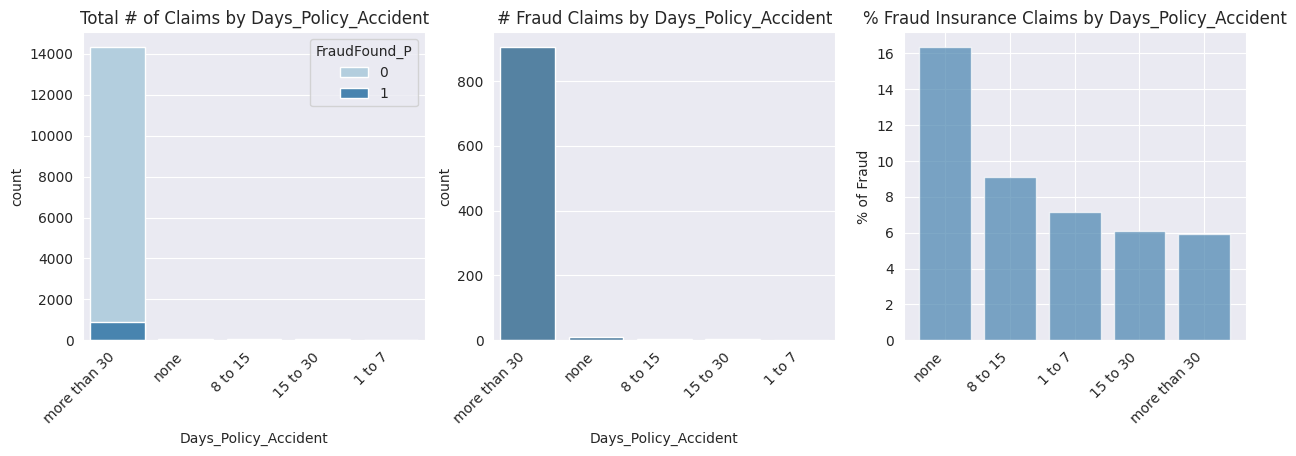

Days_Policy_Claim  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
          8 to 15             1      3                14.29                             0.33
         15 to 30             1      6                10.71                             0.65
     more than 30             1    914                 5.96                            99.02
             none             0      1               100.00                              NaN
     more than 30             0  14428                94.04                              NaN
         15 to 30             0     50                89.29                              NaN
          8 to 15             0     18                85.71                              NaN


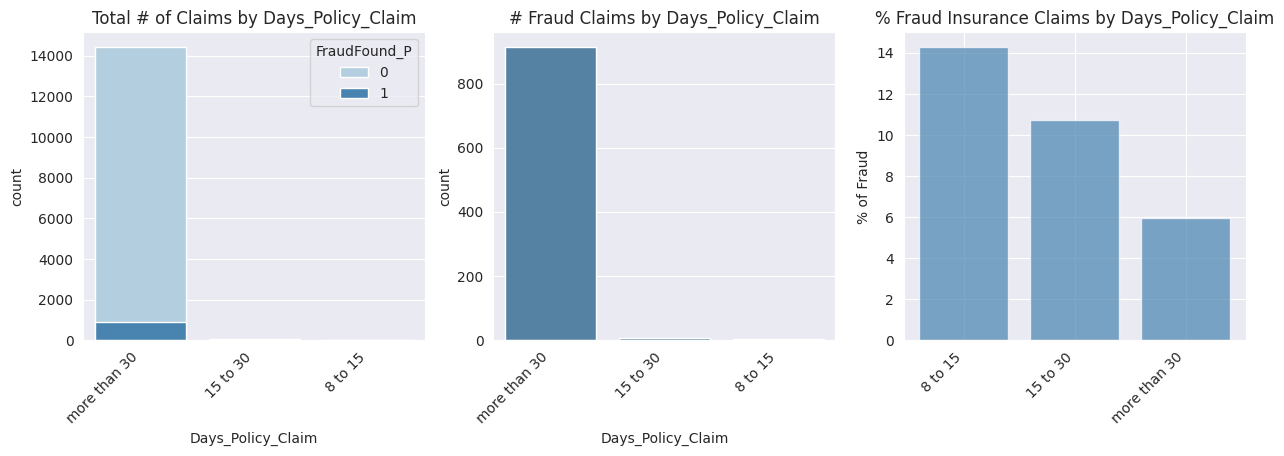

PastNumberOfClaims  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
              none             1    339                 7.79                            36.73
                 1             1    222                 6.21                            24.05
            2 to 4             1    294                 5.36                            31.85
       more than 4             1     68                 3.38                             7.37
       more than 4             0   1942                96.62                              NaN
            2 to 4             0   5191                94.64                              NaN
                 1             0   3351                93.79                              NaN
              none             0   4013                92.21                              NaN


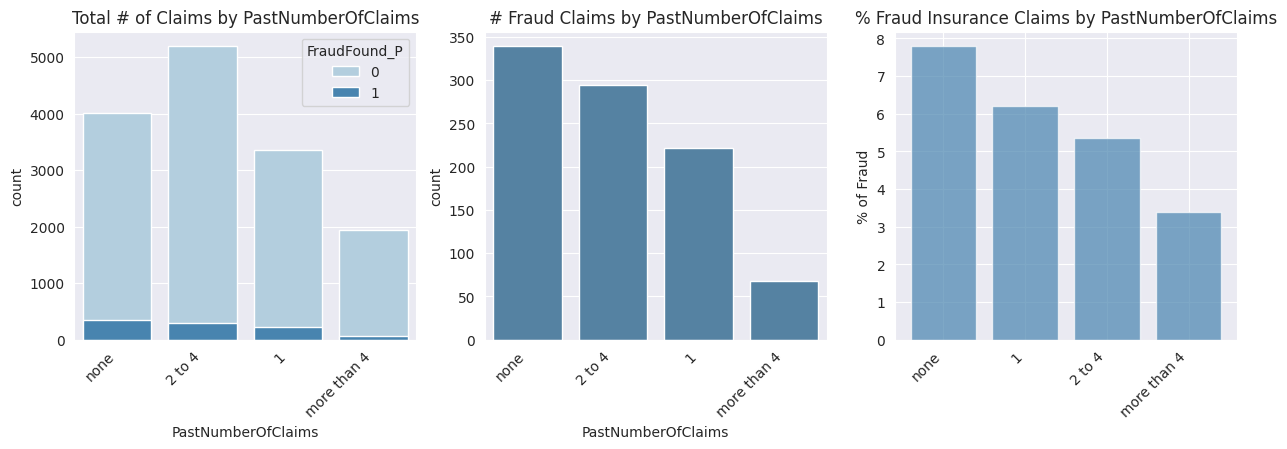

AgeOfVehicle  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
     4 years             1     21                 9.17                             2.28
         new             1     32                 8.58                             3.47
     3 years             1     13                 8.55                             1.41
     5 years             1     95                 7.00                            10.29
     6 years             1    228                 6.61                            24.70
     7 years             1    325                 5.60                            35.21
 more than 7             1    206                 5.17                            22.32
     2 years             1      3                 4.11                             0.33
     2 years             0     70                95.89                              NaN
 more than 7             0   3775                94.83                              NaN
     7 years             0   548

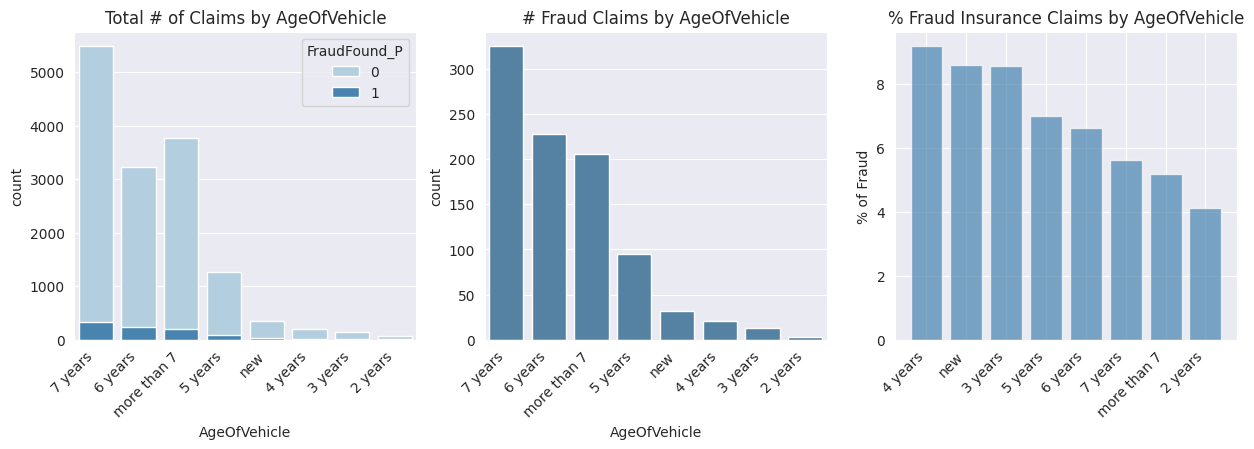

AgeOfPolicyHolder  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
         21 to 25             1     16                14.81                             1.73
         18 to 20             1      2                13.33                             0.22
         16 to 17             1     31                 9.69                             3.36
         31 to 35             1    360                 6.44                            39.00
          over 65             1     30                 5.91                             3.25
         36 to 40             1    237                 5.86                            25.68
         26 to 30             1     33                 5.38                             3.58
         41 to 50             1    144                 5.09                            15.60
         51 to 65             1     70                 5.03                             7.58
         51 to 65             0   1322                94.97           

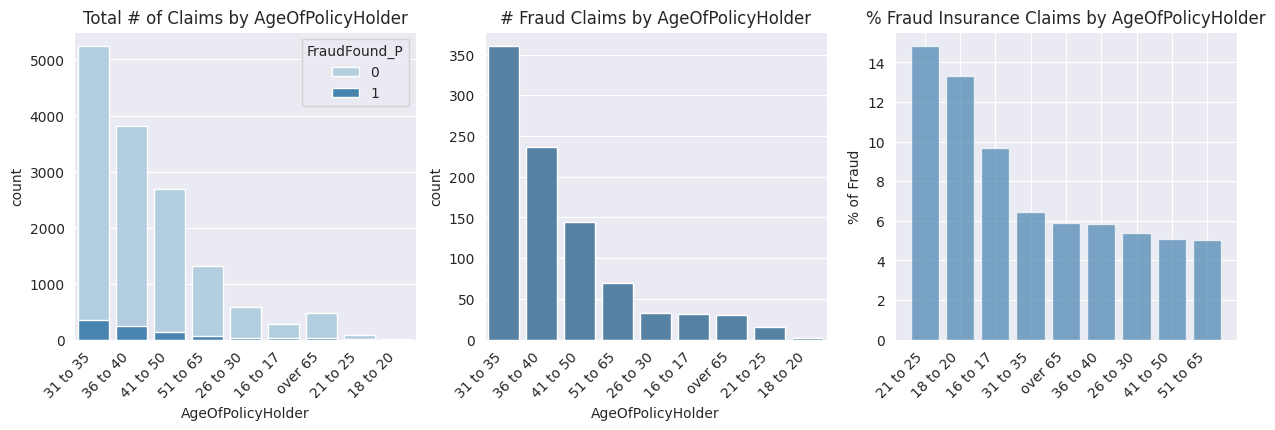

PoliceReportFiled  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
               No             1    907                 6.05                            98.27
              Yes             1     16                 3.74                             1.73
              Yes             0    412                96.26                              NaN
               No             0  14085                93.95                              NaN


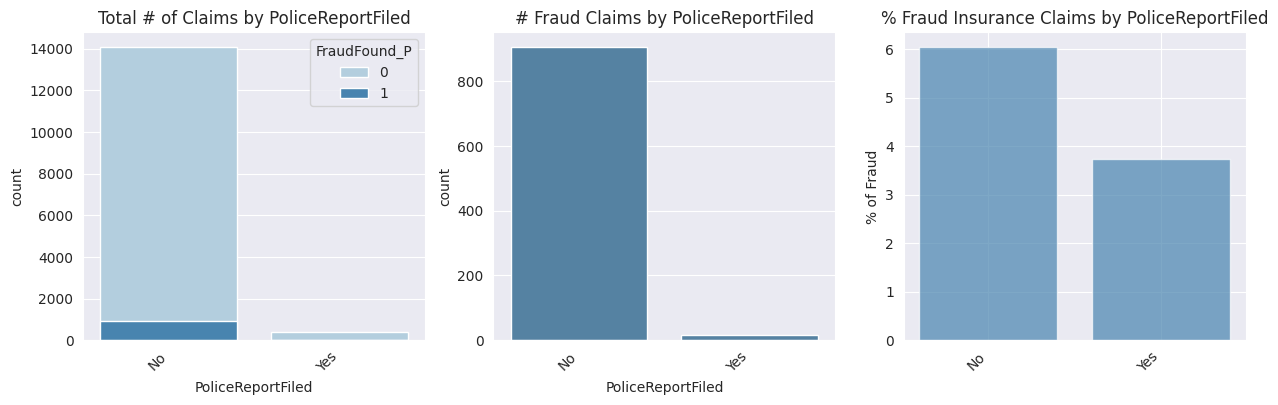

WitnessPresent  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
            No             1    920                 6.00                            99.67
           Yes             1      3                 3.45                             0.33
           Yes             0     84                96.55                              NaN
            No             0  14413                94.00                              NaN


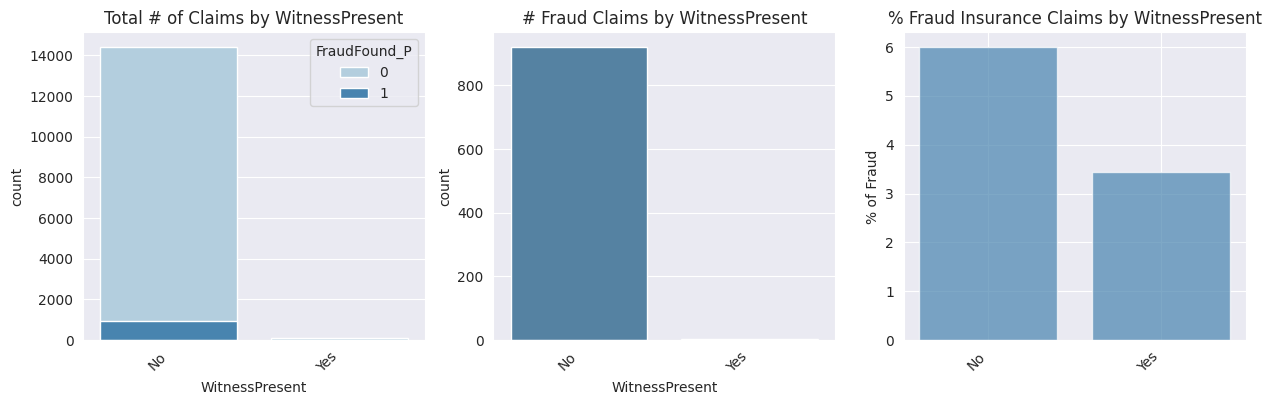

AgentType  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
 External             1    919                 6.05                            99.57
 Internal             1      4                 1.66                             0.43
 Internal             0    237                98.34                              NaN
 External             0  14260                93.95                              NaN


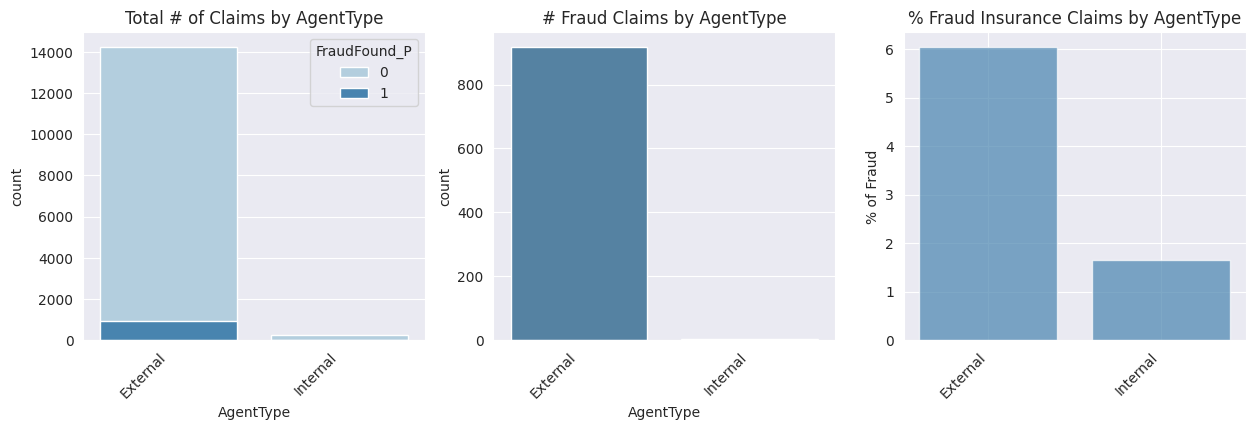

NumberOfSuppliments  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
               none             1    472                 6.70                            51.14
             1 to 2             1    159                 6.39                            17.23
        more than 5             1    195                 5.04                            21.13
             3 to 5             1     97                 4.81                            10.51
             3 to 5             0   1920                95.19                              NaN
        more than 5             0   3672                94.96                              NaN
             1 to 2             0   2330                93.61                              NaN
               none             0   6575                93.30                              NaN


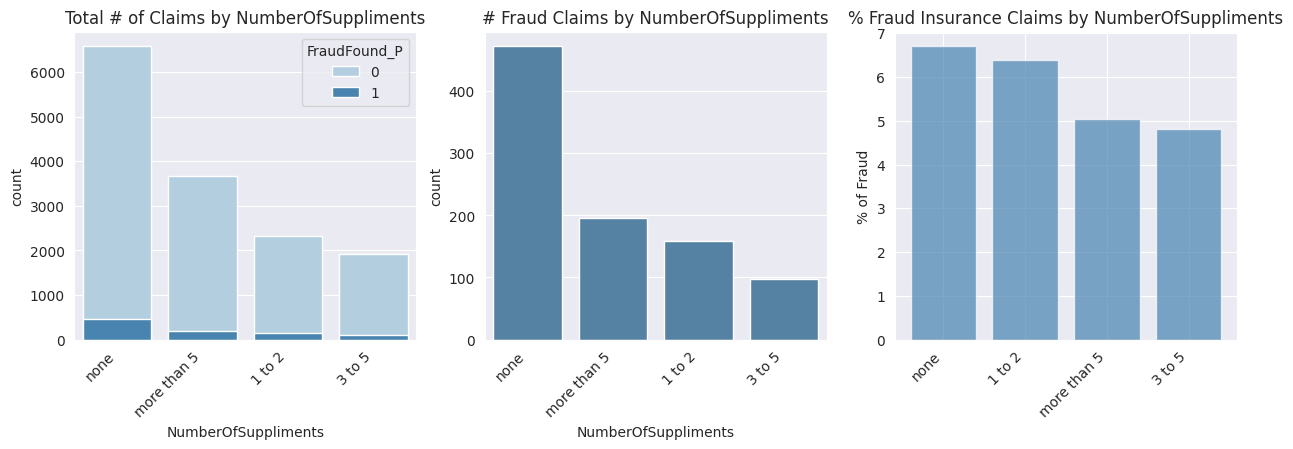

AddressChange_Claim  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
     under 6 months             1      3                75.00                             0.33
       2 to 3 years             1     51                17.53                             5.53
             1 year             1     11                 6.47                             1.19
          no change             1    825                 5.76                            89.38
       4 to 8 years             1     33                 5.23                             3.58
       4 to 8 years             0    598                94.77                              NaN
          no change             0  13499                94.24                              NaN
             1 year             0    159                93.53                              NaN
       2 to 3 years             0    240                82.47                              NaN
     under 6 months             0      1          

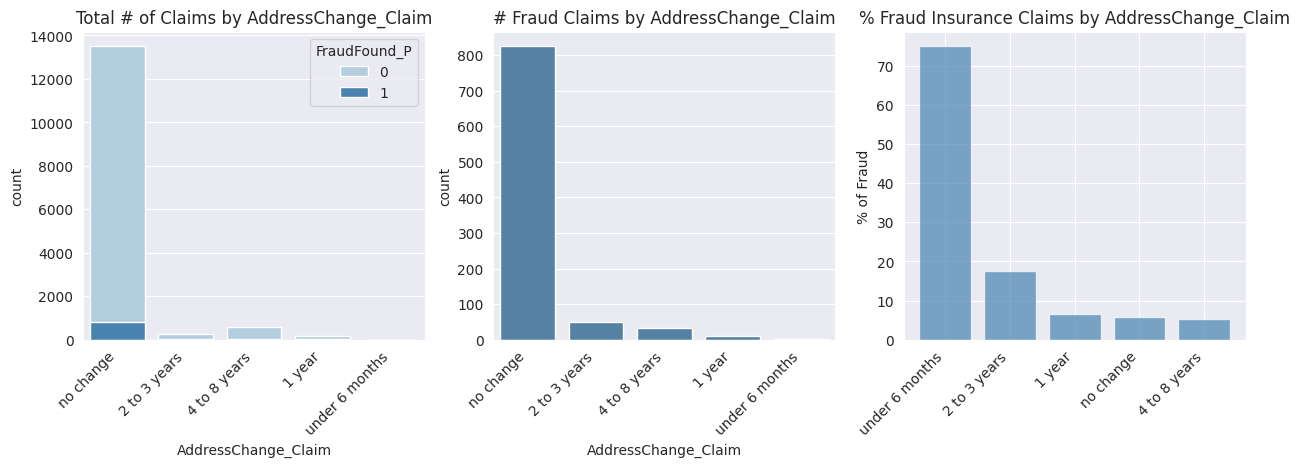

NumberOfCars  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
      3 to 4             1     29                 7.80                             3.14
  2 vehicles             1     43                 6.06                             4.66
   1 vehicle             1    850                 5.94                            92.09
      5 to 8             1      1                 4.76                             0.11
 more than 8             0      2               100.00                              NaN
      5 to 8             0     20                95.24                              NaN
   1 vehicle             0  13466                94.06                              NaN
  2 vehicles             0    666                93.94                              NaN
      3 to 4             0    343                92.20                              NaN


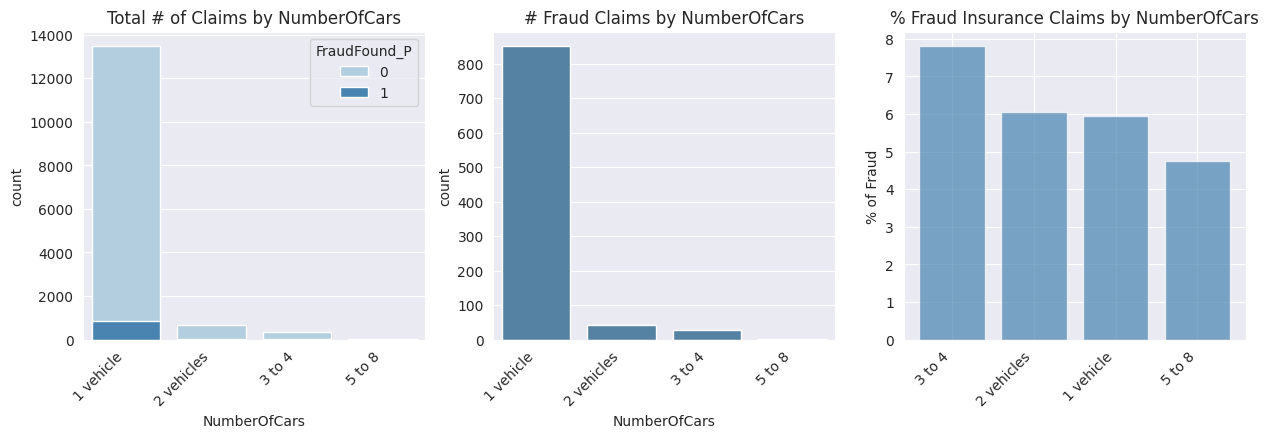

Year  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
1994             1    409                 6.66                            44.31
1995             1    301                 5.79                            32.61
1996             1    213                 5.22                            23.08
1996             0   3870                94.78                              NaN
1995             0   4894                94.21                              NaN
1994             0   5733                93.34                              NaN


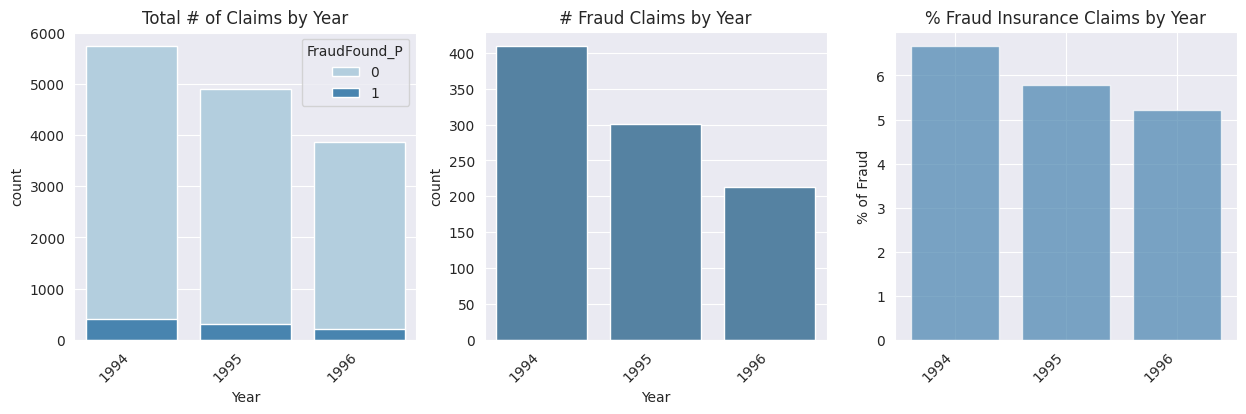

BasePolicy  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
All Perils             1    452                10.16                            48.97
 Collision             1    435                 7.30                            47.13
 Liability             1     36                 0.72                             3.90
 Liability             0   4973                99.28                              NaN
 Collision             0   5527                92.70                              NaN
All Perils             0   3997                89.84                              NaN


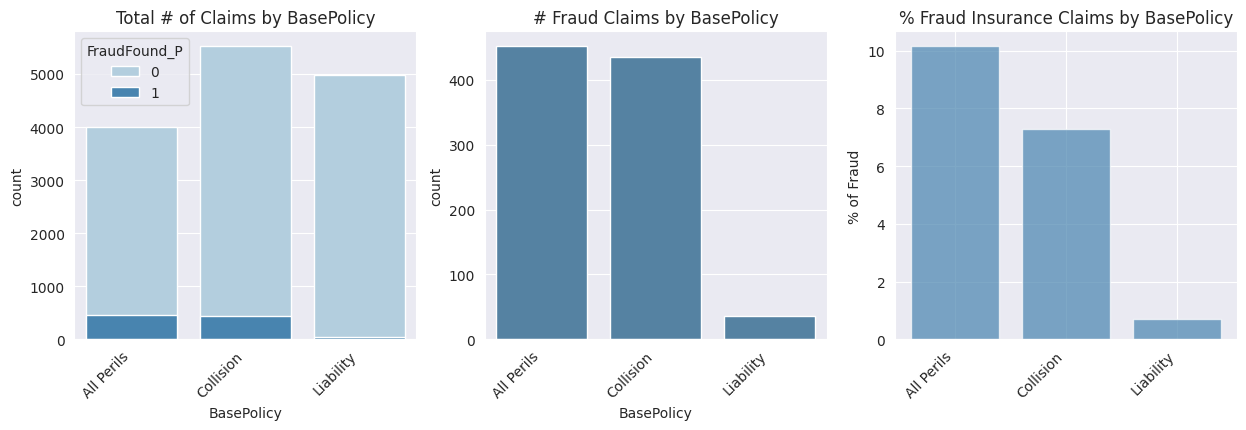

Age_Bracket  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
   18 to 20             1     16                14.81                             1.73
   16 to 17             1      2                13.33                             0.22
   31 to 35             1    190                 6.76                            20.59
   36 to 40             1    158                 6.76                            17.12
   26 to 30             1    170                 6.11                            18.42
    over 65             1     30                 5.91                             3.25
   21 to 25             1     33                 5.38                             3.58
   41 to 50             1    186                 5.35                            20.15
   51 to 65             1    138                 4.98                            14.95
   51 to 65             0   2632                95.02                              NaN
   41 to 50             0   3289           

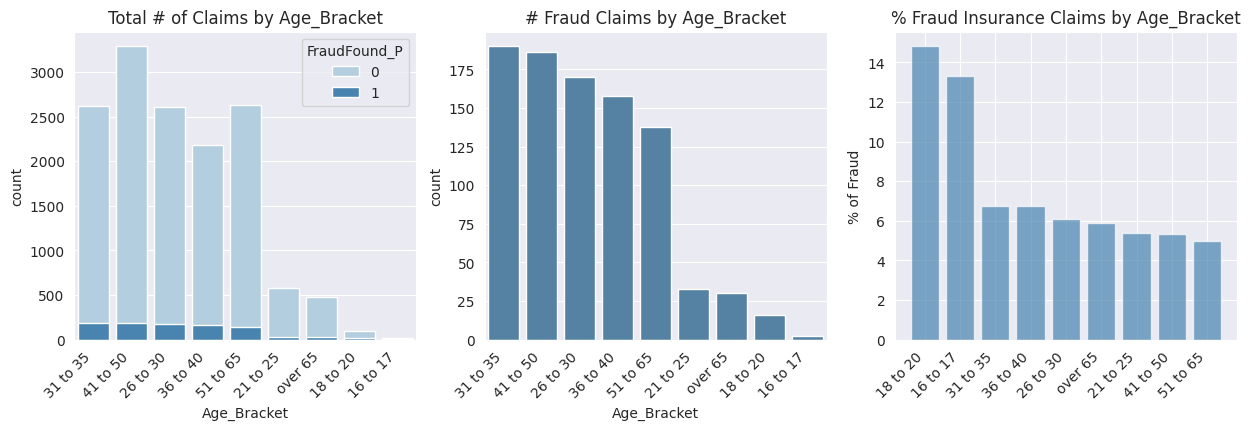

VehicleCategory_BasePolicy  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
         Sport - Collision             1     48                13.79                             5.20
      Utility - All Perils             1     41                12.06                             4.44
        Sedan - All Perils             1    411                10.06                            44.53
       Utility - Collision             1      3                10.00                             0.33
         Sedan - Collision             1    384                 6.88                            41.60
         Sport - Liability             1     36                 0.72                             3.90
        Sport - All Perils             0     22               100.00                              NaN
       Utility - Liability             0     21               100.00                              NaN
         Sport - Liability             0   4952                99.28              

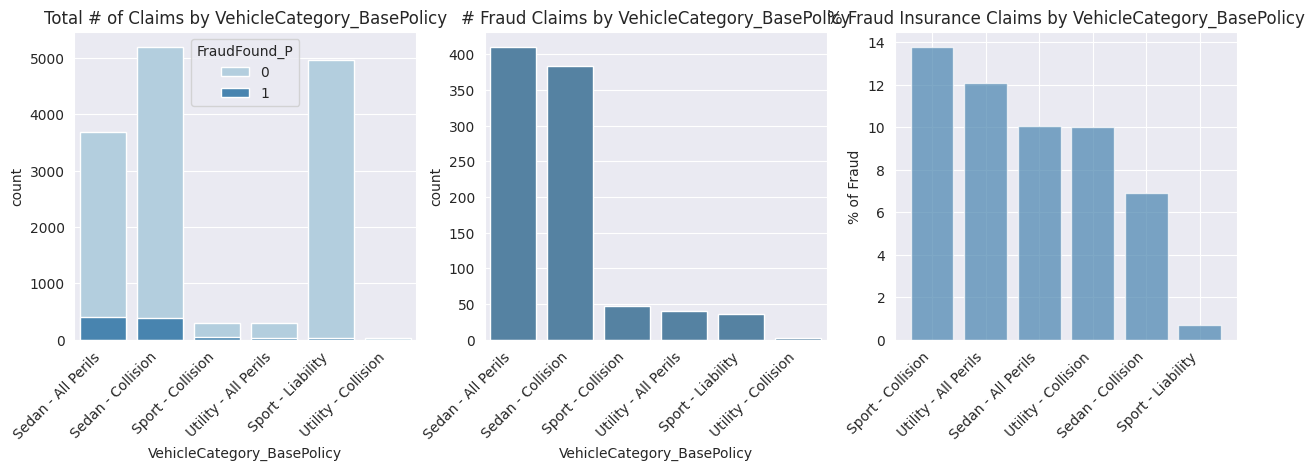

In [30]:
for col in df_fraud.columns:
    if (col != 'FraudFound_P' and col !='Age'):
        sns.set_style('darkgrid')

        # Create a DataFrame for count and percentage of fraud cases
        fraud_cases = pd.DataFrame(df_fraud.groupby([col, 'FraudFound_P']).size(), columns=['Count']).reset_index()
        total_counts = fraud_cases.groupby(col)['Count'].transform('sum')
        fraud_cases['Percentage of Fraud'] = round(fraud_cases['Count'] / total_counts * 100, 2)


        if (fraud_cases['FraudFound_P'] == 1).any():
            total_fraud_cases = fraud_cases[fraud_cases['FraudFound_P'] == 1]['Count'].sum()
            fraud_cases.loc[fraud_cases['FraudFound_P'] == 1, 'Percentage of Total Fraud Cases'] = round(fraud_cases['Count'] / total_fraud_cases * 100, 2)

        fraud_cases = fraud_cases.sort_values(by=['FraudFound_P', 'Percentage of Fraud', col], ascending=[False, False, True])

        # Print the fraud_cases DataFrame
        print(fraud_cases.to_string(index=False))

        # Plot three graphs:
        fig, axes = plt.subplots(1, 3, figsize=(15, 4))

        # Plot 1: the count of FraudFound_P (both 0 and 1) for each category of a given variable
        plt.subplot(1, 3, 1)
        order = df_fraud[df_fraud['FraudFound_P'] == 1][col].value_counts().index
        ax = sns.countplot(data=df_fraud, x=col, hue='FraudFound_P', palette='Blues', dodge=False, order=order)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        plt.title(f'Total # of Claims by {col}')

        # Plot 2: the count of FraudFound_P == 1 for each category of a given variable
        plt.subplot(1, 3, 2)
        ax = sns.countplot(data=df_fraud[df_fraud['FraudFound_P'] == 1], x=col, color='#4884af', dodge=False, order=order)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        plt.title(f'# Fraud Claims by {col}')

        # Plot 3: the  % of FraudFound_P == 1 for each category of a given variable
        plt.subplot(1, 3, 3)
        fraud_cases_subset = fraud_cases[fraud_cases['FraudFound_P'] == 1]
        fraud_cases_subset = fraud_cases_subset.sort_values(by='Percentage of Fraud', ascending=False)  # Sort by Percentage of Fraud
        plt.bar(x=fraud_cases_subset[col], height=fraud_cases_subset['Percentage of Fraud'], color='#4884af', label='Percentage of Fraud', alpha=0.7)
        plt.xticks(rotation=45, ha='right')
        plt.ylabel('% of Fraud')
        plt.title(f'% Fraud Insurance Claims by {col}')

        plt.show()


In [31]:
# we observed that DaysOfWeekClaimed and MonthClaimed both included 0 values
df_fraud[(df_fraud['DayOfWeekClaimed'] == '0') | (df_fraud['MonthClaimed'] == '0')]['FraudFound_P']

1516    0
Name: FraudFound_P, dtype: int64

In [32]:
df_fraud[df_fraud['DayOfWeekClaimed'] == '0']

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Age_Bracket,VehicleCategory_BasePolicy
1516,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,...,No,No,External,none,no change,1 vehicle,1994,All Perils,36 to 40,Sedan - All Perils


In [33]:
# lets remove rows where  DayOfWeekClaimed or MonthClaimed is equal to 0 (and FraudFound_P == 0)

df_fraud = df_fraud[~((df_fraud['FraudFound_P'] == 0) & ((df_fraud['DayOfWeekClaimed'] == '0') | (df_fraud['MonthClaimed'] == '0')))]


In [34]:
# Confirming we removed the row (rows) where  DayOfWeekClaimed or MonthClaimed is equal to 0 (and FraudFound_P == 0)
df_fraud[(df_fraud['DayOfWeekClaimed'] == '0') | (df_fraud['MonthClaimed'] == '0')]['FraudFound_P']

Series([], Name: FraudFound_P, dtype: int64)

In [35]:
# Another way to identify which variables have a significant impact on the target variable (FraudFound_P) - ANOVA
from scipy import stats

categorical_features = df_fraud.select_dtypes(include=['object']).columns
anova_results = {}

for feature in categorical_features:
    grouped = df_fraud.groupby(feature)['FraudFound_P']
    f_value, p_value = stats.f_oneway(*(group for name, group in grouped))
    anova_results[feature] = {'F-Value': f_value, 'p-Value': p_value}

# Converting results to a DataFrame for better visualization
anova_df = pd.DataFrame(anova_results).T
anova_df['p-Value'] = anova_df['p-Value'].round(5)

# Add significance column
anova_df['Significance'] = np.where(anova_df['p-Value'] < 0.05, '*', '')


# Sort results by F-value and p-value significance level
anova_df = anova_df.sort_values(by=['F-Value', 'Significance'], ascending=[False, True])

print(anova_df)

                               F-Value  p-Value Significance
Fault                       270.870598  0.00000            *
BasePolicy                  206.839798  0.00000            *
VehicleCategory             148.260040  0.00000            *
VehicleCategory_BasePolicy   64.290350  0.00000            *
PolicyType                   56.250528  0.00000            *
AddressChange_Claim          26.351155  0.00000            *
Deductible                   24.243000  0.00000            *
PastNumberOfClaims           17.904795  0.00000            *
AccidentArea                 17.380305  0.00003            *
Sex                          13.851336  0.00020            *
VehiclePrice                 13.621873  0.00000            *
AgentType                     8.145948  0.00432            *
NumberOfSuppliments           6.057405  0.00041            *
Year                          4.798345  0.00826            *
AgeOfPolicyHolder             4.144591  0.00006            *
PoliceReportFiled       

In [36]:
df_fraud.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'RepNumber', 'Deductible',
       'DriverRating', 'Days_Policy_Accident', 'Days_Policy_Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'Age_Bracket', 'VehicleCategory_BasePolicy'],
      dtype='object')

In [37]:
df_fraud_backup = df_fraud.copy()


In [39]:
df_fraud_for_modeling = df_fraud.drop(['Age'], axis=1)

In [40]:
df_fraud_for_modeling.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'RepNumber', 'Deductible',
       'DriverRating', 'Days_Policy_Accident', 'Days_Policy_Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'Age_Bracket', 'VehicleCategory_BasePolicy'],
      dtype='object')

In [41]:
df_fraud_for_modeling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15419 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Month                       15419 non-null  object
 1   WeekOfMonth                 15419 non-null  object
 2   DayOfWeek                   15419 non-null  object
 3   Make                        15419 non-null  object
 4   AccidentArea                15419 non-null  object
 5   DayOfWeekClaimed            15419 non-null  object
 6   MonthClaimed                15419 non-null  object
 7   WeekOfMonthClaimed          15419 non-null  object
 8   Sex                         15419 non-null  object
 9   MaritalStatus               15419 non-null  object
 10  Fault                       15419 non-null  object
 11  PolicyType                  15419 non-null  object
 12  VehicleCategory             15419 non-null  object
 13  VehiclePrice                15419 non-null  ob

In [42]:
def column_to_dummy_vars(dataframe, column_name):
    dummies = pd.get_dummies(dataframe[column_name], prefix=f"{column_name} = ")
    dataframe = pd.concat([dataframe, dummies], axis=1)
    dataframe = dataframe.drop([column_name], axis=1)
    return dataframe

In [43]:
#apply the function to above to all columns that have cateogorical data
for col in df_fraud_for_modeling:
     if df_fraud_for_modeling[col].dtype == 'object':

        df_fraud_for_modeling = column_to_dummy_vars(df_fraud_for_modeling, col)

In [44]:
pd.DataFrame(df_fraud_for_modeling['FraudFound_P'].value_counts())


,FraudFound_P
0,14496
1,923


In [45]:
df_fraud_for_modeling.columns

Index(['FraudFound_P', 'Month = _Apr', 'Month = _Aug', 'Month = _Dec',
       'Month = _Feb', 'Month = _Jan', 'Month = _Jul', 'Month = _Jun',
       'Month = _Mar', 'Month = _May',
       ...
       'Age_Bracket = _51 to 65', 'Age_Bracket = _over 65',
       'VehicleCategory_BasePolicy = _Sedan - All Perils',
       'VehicleCategory_BasePolicy = _Sedan - Collision',
       'VehicleCategory_BasePolicy = _Sport - All Perils',
       'VehicleCategory_BasePolicy = _Sport - Collision',
       'VehicleCategory_BasePolicy = _Sport - Liability',
       'VehicleCategory_BasePolicy = _Utility - All Perils',
       'VehicleCategory_BasePolicy = _Utility - Collision',
       'VehicleCategory_BasePolicy = _Utility - Liability'],
      dtype='object', length=192)

In [ ]:
df_fraud_for_modeling.info()

In [46]:
df_fraud_for_modeling.head()

,FraudFound_P,Month = _Apr,Month = _Aug,Month = _Dec,Month = _Feb,Month = _Jan,Month = _Jul,Month = _Jun,Month = _Mar,Month = _May,...,Age_Bracket = _51 to 65,Age_Bracket = _over 65,VehicleCategory_BasePolicy = _Sedan - All Perils,VehicleCategory_BasePolicy = _Sedan - Collision,VehicleCategory_BasePolicy = _Sport - All Perils,VehicleCategory_BasePolicy = _Sport - Collision,VehicleCategory_BasePolicy = _Sport - Liability,VehicleCategory_BasePolicy = _Utility - All Perils,VehicleCategory_BasePolicy = _Utility - Collision,VehicleCategory_BasePolicy = _Utility - Liability
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [47]:
# splitting the dataset
from sklearn.model_selection import train_test_split

# Separating features and target variable
X = df_fraud_for_modeling.drop('FraudFound_P', axis=1)
y = df_fraud_for_modeling['FraudFound_P']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [48]:
# Logistic regression - baseline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the balanced dataset
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lg = logreg_model.predict(X_test)

# Evaluate the performance of the model
conf_matrix = confusion_matrix(y_test, y_pred_lg)
classification_rep = classification_report(y_test, y_pred_lg)

# Print the results
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)


Confusion Matrix:
 [[2889   10]
 [ 182    3]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       0.23      0.02      0.03       185

    accuracy                           0.94      3084
   macro avg       0.59      0.51      0.50      3084
weighted avg       0.90      0.94      0.91      3084



In [49]:
# Decision Tree basic

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the SMOTE dataset
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the performance of the model
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)

# Print the results
print("\nDecision Tree Confusion Matrix:\n", conf_matrix_dt)
print("\nDecision Tree Classification Report:\n", classification_rep_dt)


Decision Tree Confusion Matrix:
 [[2714  185]
 [ 144   41]]

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      2899
           1       0.18      0.22      0.20       185

    accuracy                           0.89      3084
   macro avg       0.57      0.58      0.57      3084
weighted avg       0.90      0.89      0.90      3084



In [50]:
# Random Forest basic

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the balanced dataset
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the performance of the model
# accuracy_rf = accuracy_score(y_test_balanced, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Print the results
print("\nRandom Forest Confusion Matrix:\n", conf_matrix_rf)
print("\nRandom Forest Classification Report:\n", classification_rep_rf)
print(f'Size of the x-train, y-train, x-test, y-test: {len(X_train), len(y_train), len(X_test), len(y_test)}')


Random Forest Confusion Matrix:
 [[2899    0]
 [ 182    3]]

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       1.00      0.02      0.03       185

    accuracy                           0.94      3084
   macro avg       0.97      0.51      0.50      3084
weighted avg       0.94      0.94      0.91      3084

Size of the x-train, y-train, x-test, y-test: (12335, 12335, 3084, 3084)


In [51]:
# XGBoost basic:
import xgboost as xgb

# Create an XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model on the training set
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the performance of the model
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)



Confusion Matrix:
 [[2877   22]
 [ 169   16]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97      2899
           1       0.42      0.09      0.14       185

    accuracy                           0.94      3084
   macro avg       0.68      0.54      0.56      3084
weighted avg       0.91      0.94      0.92      3084



[[True Negative (TN)   False Positive (FP)] <br/>
 [False Negative (FN)  True Positive (TP)]]

In [52]:
# Applying SMOTE to oversample the minority class cases:

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [53]:
y_train_smote.value_counts()


1    11597
0    11597
Name: FraudFound_P, dtype: int64

In [54]:
# Logistic Regression after applying SMOTE:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the balanced dataset
logreg_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the performance of the model
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)



Confusion Matrix:
 [[2887   12]
 [ 182    3]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       0.20      0.02      0.03       185

    accuracy                           0.94      3084
   macro avg       0.57      0.51      0.50      3084
weighted avg       0.90      0.94      0.91      3084



In [55]:
# Decision Tree after SMOTE:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the SMOTE dataset
dt_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the performance of the model
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)

# Print the results
print("\nDecision Tree Confusion Matrix:\n", conf_matrix_dt)
print("\nDecision Tree Classification Report:\n", classification_rep_dt)



Decision Tree Confusion Matrix:
 [[2704  195]
 [ 156   29]]

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      2899
           1       0.13      0.16      0.14       185

    accuracy                           0.89      3084
   macro avg       0.54      0.54      0.54      3084
weighted avg       0.90      0.89      0.89      3084



In [56]:
# Decision Tree after SMOTE with  hyperparameters tuning

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4],
    'class_weight': ['balanced', None]
}

# Create the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(dt_model, param_grid, scoring='f1', cv=5)

# Fit the grid search to the data
grid_search.fit(X_train_smote, y_train_smote)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

# Get the best model
best_dt_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_prob_dt = best_dt_model.predict_proba(X_test)[:, 1]

# Adjust the decision threshold (example: set it to 0.3)
custom_threshold = 0.3
y_pred_dt = (y_pred_prob_dt >= custom_threshold).astype(int)

# Evaluate the performance of the best Decision Tree model
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)

# Print the results
print("\nBest Decision Tree Confusion Matrix:\n", conf_matrix_dt)
print("\nBest Decision Tree Classification Report:\n", classification_rep_dt)




Best Parameters:  {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}

Best Decision Tree Confusion Matrix:
 [[2675  224]
 [ 139   46]]

Best Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.94      2899
           1       0.17      0.25      0.20       185

    accuracy                           0.88      3084
   macro avg       0.56      0.59      0.57      3084
weighted avg       0.90      0.88      0.89      3084



In [57]:
y_test.value_counts()

0    2899
1     185
Name: FraudFound_P, dtype: int64

In [ ]:
# Ensemble Models (black-box)

In [58]:
# Random Forest + after SMOTE using hypertuning parameters from Decision Tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Best hyperparameters obtained from the Decision Tree model
best_dt_params = {
    'class_weight': 'balanced',
    'criterion': 'gini',
    'max_depth': None,
    'min_samples_leaf': 4,
    'min_samples_split': 2
}

# Create a Random Forest model using the best hyperparameters
rf_model = RandomForestClassifier(**best_dt_params, random_state=42)

# Train the model on your data
rf_model.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the performance of the Random Forest model
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Print the results
print("\nRandom Forest Confusion Matrix:\n", conf_matrix_rf)
print("\nRandom Forest Classification Report:\n", classification_rep_rf)



Random Forest Confusion Matrix:
 [[2898    1]
 [ 181    4]]

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       0.80      0.02      0.04       185

    accuracy                           0.94      3084
   macro avg       0.87      0.51      0.51      3084
weighted avg       0.93      0.94      0.91      3084



In [59]:
# Random Forest after applying SMOTE

# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the balanced dataset
rf_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the performance of the model
# accuracy_rf = accuracy_score(y_test_balanced, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Print the results
print("\nRandom Forest Confusion Matrix:\n", conf_matrix_rf)
print("\nRandom Forest Classification Report:\n", classification_rep_rf)



Random Forest Confusion Matrix:
 [[2899    0]
 [ 176    9]]

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       1.00      0.05      0.09       185

    accuracy                           0.94      3084
   macro avg       0.97      0.52      0.53      3084
weighted avg       0.95      0.94      0.92      3084



In [ ]:
# Random Forest after applying SMOTE with hyperparameter tuning

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report


# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
   'n_estimators': [50, 100, 200],
   'max_depth': [None, 10, 20],
   'min_samples_split': [2, 5, 10],
   'min_samples_leaf': [1, 2, 4]
}

# param_grid = {
#     'n_estimators': [100, 200, 300, 400],
#     'max_depth': [None, 5, 10, 15],
#     'min_samples_split': [5, 10, 20],
#     'min_samples_leaf': [2, 3, 5]
# }

# Create GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)

# Fit the model with early stopping
grid_search.fit(X_train_smote, y_train_smote)

# Get the best model from the grid search
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the performance of the model
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Print the results
print("\nRandom Forest Confusion Matrix:\n", conf_matrix_rf)
print("\nRandom Forest Classification Report:\n", classification_rep_rf)
print("Best Hyperparameters:", grid_search.best_params_)


In [ ]:
# XGBoost After SMOTE:
import xgboost as xgb

# Create an XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model on the training set
xgb_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the performance of the model
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)


In [ ]:
# XGBoost After SMOTE with hyperparameters tuning

import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Create an XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='f1', cv=5)

# Fit the grid search to the data
grid_search.fit(X_train_smote, y_train_smote)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Use the best model to make predictions on the test set
best_xgb_model = grid_search.best_estimator_
y_pred = best_xgb_model.predict(X_test)

# Evaluate the performance of the best model
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)


In [ ]:
# NN model applied after SMOTE:


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report

# added
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback

# added
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)


# Create a Sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(128, input_dim=X_train_smote.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training set
#model.fit(X_train_smote, y_train_smote, epochs=10, batch_size=32, validation_split=0.2)
model.fit(X_train_smote, y_train_smote, epochs=20, batch_size=64, validation_split=0.2, callbacks=[early_stopping_callback])
# try decreasing the batch size


# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the performance of the model
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)



Move the code snippets below to the appropriate places once done with all the models

**Trying Random Under Sampler, Random Over Sampler and SMOTEENN on each model**


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix,  accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler

# Separate features and target
X = df_fraud_for_modeling.drop('FraudFound_P', axis=1)
y = df_fraud_for_modeling['FraudFound_P']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply Random Under Sampler
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Initialise models with random_state
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

# Dictionary to store metrics
metrics = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)

    # Calculate metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    metrics[name] = {"Precision": precision, "Recall": recall, "F1 Score": f1, "Confusion Matrix": conf_matrix}

# Display the metrics
for model, metric in metrics.items():
    print(f"Model: {model}")
    for metric_name, value in metric.items():
        if metric_name == "Confusion Matrix":
            print(f"{metric_name}:\n{value}\n")
        else:
            print(f"{metric_name}: {value}")
    print("\n")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Decision Tree
Precision: 0.12649800266311584
Recall: 0.6643356643356644
F1 Score: 0.21252796420581654
Confusion Matrix:
[[3028 1312]
 [  96  190]]



Model: Random Forest
Precision: 0.13700107874865156
Recall: 0.8881118881118881
F1 Score: 0.23738317757009345
Confusion Matrix:
[[2740 1600]
 [  32  254]]



Model: Logistic Regression
Precision: 0.1373100731570062
Recall: 0.8531468531468531
F1 Score: 0.23654871546291809
Confusion Matrix:
[[2807 1533]
 [  42  244]]



Model: XGBoost
Precision: 0.14885496183206107
Recall: 0.8181818181818182
F1 Score: 0.2518837459634015
Confusion Matrix:
[[3002 1338]
 [  52  234]]





In [61]:
#using SMOTEENN
from imblearn.combine import SMOTEENN

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

# InitialiSe models with random_state where applicable
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)

    # Calculate and print metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Model: {name}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"Confusion Matrix:\n{conf_matrix}\n")

Model: Decision Tree
Precision: 0.8571428571428571
Recall: 0.02097902097902098
F1 Score: 0.040955631399317405
Confusion Matrix:
[[4339    1]
 [ 280    6]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: Random Forest
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
[[4340    0]
 [ 286    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: Logistic Regression
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
[[4340    0]
 [ 286    0]]

Model: XGBoost
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
[[4340    0]
 [ 286    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
#trying Random Over Sampling:
from imblearn.over_sampling import RandomOverSampler
# Apply Random Over Sampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Initialise models with random_state where applicable
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)

    # Calculate and print metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Model: {name}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"Confusion Matrix:\n{conf_matrix}\n")

Model: Decision Tree
Precision: 0.19032258064516128
Recall: 0.2062937062937063
F1 Score: 0.19798657718120805
Confusion Matrix:
[[4089  251]
 [ 227   59]]

Model: Random Forest
Precision: 0.5
Recall: 0.017482517482517484
F1 Score: 0.033783783783783786
Confusion Matrix:
[[4335    5]
 [ 281    5]]



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Precision: 0.13131900058105753
Recall: 0.7902097902097902
F1 Score: 0.22521175884404585
Confusion Matrix:
[[2845 1495]
 [  60  226]]

Model: XGBoost
Precision: 0.2073170731707317
Recall: 0.2972027972027972
F1 Score: 0.24425287356321837
Confusion Matrix:
[[4015  325]
 [ 201   85]]



In [64]:
#trying all sampling metrics - random over sampling, SMOTEENN, random over sampling and SMOTE- for each model


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
import warnings


# Suppress UserWarning about delayed
#warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Sampling techniques
samplers = {
    'RandomUnderSampler': RandomUnderSampler(random_state=42),
    'SMOTEENN': SMOTEENN(random_state=42),
    'RandomOverSampler': RandomOverSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42)
}

# Models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'XGBoost': XGBClassifier(random_state=42)
}

# DataFrame to store results
results = []

# Apply each sampling method and train each model
for sampler_name, sampler in samplers.items():
    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    for model_name, model in models.items():
        model.fit(X_resampled, y_resampled)
        y_pred = model.predict(X_test)

        # Store results
        results.append({
            'Model': model_name,
            'Sampler': sampler_name,
            'Precision': precision_score(y_test, y_pred),
            'Recall': recall_score(y_test, y_pred),
            'F1 Score': f1_score(y_test, y_pred),
            'Accuracy Score' : accuracy_score(y_test, y_pred)
        })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Print the DataFrame
print(results_df.to_string(index=False))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              Model            Sampler  Precision   Recall  F1 Score  Accuracy Score
      Decision Tree RandomUnderSampler   0.126498 0.664336  0.212528        0.695633
      Random Forest RandomUnderSampler   0.137001 0.888112  0.237383        0.647211
Logistic Regression RandomUnderSampler   0.137233 0.853147  0.236434        0.659317
            XGBoost RandomUnderSampler   0.148855 0.818182  0.251884        0.699524
      Decision Tree           SMOTEENN   0.857143 0.020979  0.040956        0.939256
      Random Forest           SMOTEENN   0.000000 0.000000  0.000000        0.938176
Logistic Regression           SMOTEENN   0.000000 0.000000  0.000000        0.938176
            XGBoost           SMOTEENN   0.000000 0.000000  0.000000        0.938176
      Decision Tree  RandomOverSampler   0.190323 0.206294  0.197987        0.896671
      Random Forest  RandomOverSampler   0.500000 0.017483  0.033784        0.938176
Logistic Regression  RandomOverSampler   0.131395 0.790210  0.225

In [ ]:
# Coefficients of the Logistic Regression

# feature names
feature_names = df_fraud_for_modeling.columns

# Get the coefficients and intercept
coefficients = logreg_model.coef_[0]
intercept = logreg_model.intercept_[0]

# DataFrame to store coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by absolute values of coefficients
coefficients_df['AbsoluteCoefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='AbsoluteCoefficient', ascending=False).drop('AbsoluteCoefficient', axis=1)

# Print the sorted coefficients DataFrame
print("\nTop 10 Most Important Features:")
print(coefficients_df.head(10))


In [ ]:
# 5 K-fold for log regression

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score

# Define a custom scorer for F1-score
f1_scorer = make_scorer(f1_score, average='weighted')

# Perform 5-fold cross-validation with F1-score as the scoring metric
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_results_f1 = cross_val_score(logreg_model, X_test, y_test, cv=cv, scoring=f1_scorer)

# Print cross-validation results for F1-score
print("Cross-Validation Results (F1-score):", cross_val_results_f1)


In [ ]:
# 5 K-fold for Decision Tree

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score

# Define a custom scorer for F1-score
f1_scorer = make_scorer(f1_score, average='weighted')

# Perform 5-fold cross-validation with F1-score as the scoring metric
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_results_f1 = cross_val_score(dt_model, X_test, y_test, cv=cv, scoring=f1_scorer)

# Print cross-validation results for F1-score
print("Cross-Validation Results (F1-score):", cross_val_results_f1)


In [ ]:
# 5 K-fold for Random Forest


from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score

# Define a custom scorer for F1-score
f1_scorer = make_scorer(f1_score, average='weighted')

# Perform 5-fold cross-validation with F1-score as the scoring metric
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_results_f1 = cross_val_score(rf_model, X_test, y_test, cv=cv, scoring=f1_scorer)

# Print cross-validation results for F1-score
print("Cross-Validation Results (F1-score):", cross_val_results_f1)


In [ ]:
# Feature Importance in Random Tree Classifier

# Get feature importance
feature_importances = rf_model.feature_importances_

# Sort features by importance
sorted_features = sorted(zip(X_balanced.columns, feature_importances), key=lambda x: x[1], reverse=True)

# Print the results
print("\nTop 15 Most Important Features:")
for feature, importance in sorted_features[:10]:
    print(f"Feature: {feature}, Importance: {importance:.3f}")

In [ ]:
# TRYING Sepi's approach:
import warnings
from sklearn.utils.parallel import delayed
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report


# Suppress UserWarning about delayed
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Initialising the Balanced Random Forest
brf_model = BalancedRandomForestClassifier(random_state=42)

# Fit the model
brf_model.fit(X_train_smote, y_train_smote)

# Predict probabilities
y_pred_proba = brf_model.predict_proba(X_test)[:, 1]

# Predict binary classes
y_pred_binary = brf_model.predict(X_test)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Generate a classification report
report = classification_report(y_test, y_pred_binary)

# Print the confusion matrix and classification report
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)


In [ ]:
# Feature Importance in BALANCED Random Tree Classifier

# Get feature importance
feature_importances = brf_model.feature_importances_

# Sort features by importance
sorted_features = sorted(zip(X.columns, feature_importances), key=lambda x: x[1], reverse=True)

# Print the results
print("\nTop 15 Most Important Features:")
for feature, importance in sorted_features[:10]:
    print(f"Feature: {feature}, Importance: {importance:.3f}")

In [ ]:
#SMOTE - Synthetic Minority Over-sampling Technique for the minority class
#!pip install imbalanced-learn


In [ ]:
from sklearn.ensemble import RandomForestClassifier

#RandomForestClassifier
rf_model_sepi = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model_sepi.fit(X_train, y_train)


In [ ]:
# Defining a new threshold
threshold = 0.2  # This value can be tuned

# Convert probabilities to predictions based on the new threshold
y_pred_new_threshold = (y_pred_proba >= threshold).astype(int)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Model predictions
y_pred_new_threshold = (brf_model.predict_proba(X_test)[:, 1] >= threshold).astype(int)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_new_threshold))
print("\nClassification Report:\n", classification_report(y_test, y_pred_new_threshold))
print("\nROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

In [ ]:
# NOT WORKING - some garbage

# Hierarchical CLustering

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

X_balanced = balanced_df.drop('FraudFound_P', axis=1)

# Create an Agglomerative Clustering model
hc_model = AgglomerativeClustering(n_clusters=3)  # Assuming binary classification

# Fit the model to the data
hc_labels = hc_model.fit_predict(X_balanced)

# Calculate silhouette scores for each data point
silhouette_vals = silhouette_samples(X_balanced, hc_labels)

# Create a DataFrame to store silhouette scores for each feature
silhouette_df = pd.DataFrame(index=X_balanced.columns)

# Calculate the mean silhouette score for each feature
silhouette_df['MeanSilhouette'] = np.abs(silhouette_vals).mean(axis=0)

# Sort the DataFrame by mean silhouette scores in descending order
silhouette_df = silhouette_df.sort_values(by='MeanSilhouette', ascending=False)

# Evaluate the performance of clustering using silhouette score
silhouette_avg = silhouette_score(X_balanced, hc_labels)

# Print the silhouette score
print("\nHierarchical Clustering Silhouette Score:", silhouette_avg)

# Print the sorted silhouette scores DataFrame
print("\nTop 10 Most Important Features for Clustering:")
print(silhouette_df.head(20))


In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering and obtain linkage matrix
linkage_matrix = linkage(X_balanced, 'ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, p=30, truncate_mode='level', leaf_rotation=45., leaf_font_size=8., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


In [ ]:
from sklearn.manifold import TSNE

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_balanced)

# Plot the clustered data in 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=hc_labels, cmap='viridis', s=50)
plt.title('t-SNE Visualization of Hierarchical Clustering')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


In [ ]:
# for later. to try NN model:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers

# Assuming you have a DataFrame named balanced_df
X = balanced_df.drop('FraudFound_P', axis=1)
y = balanced_df['FraudFound_P']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions on the test set
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)
print("\nAccuracy:", accuracy)


In [ ]:
# this was supposed to go with the chi-square results in EDA but it does not work...
# trying (and failing?) to use logistic regression for evaluation the association between each variable and the output variable
# it does not work because it produces the same result for all of them (?)???

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
import pandas as pd

# Selecting relevant columns
features = df_fraud_for_modeling.drop(['FraudFound_P'], axis=1)

# Create an empty DataFrame to store results
model_results = pd.DataFrame(columns=['Feature', 'Precision', 'Recall', 'F1-Score', 'FraudPrediction'])

# Loop through columns and perform logistic regression
for col in features.columns:
    X = features[[col]]
    y = df_fraud_for_modeling['FraudFound_P']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and fit the logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate metrics
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

    # Create a row with the results
    result_row = pd.DataFrame([[col, precision, recall, f1, '*']], columns=model_results.columns)

    # Append the row to the results DataFrame
    model_results = pd.concat([model_results, result_row], ignore_index=True)

# Print the results
print(model_results)


**Features Summary:**

1. **Make (Car Manufacturer):**
   - Honda shows a higher percentage of insurance fraud (6.39%) compared to other cars.

2. **Accident Area:**
   - Higher fraud percentage in rural areas (8.32%) compared to urban areas (5.72%).

3. **Sex:**
   - Higher percentage of fraud in male customers (6.29%) compared to female customers (4.34%).

4. **Marital Status:**
   - Highest fraud percentage in widows (8.57%), but the number of cases is relatively low.
   - Married and single categories have comparable fraud percentages (6.01% vs. 5.94%).

5. **Fault in the Accident:**
   - Insurance fraud is more common when it's the policyholder's fault (7.89%) rather than the third party's fault (0.88%).

6. **Policy Type:**
   - Highest fraud percentages in sport collision (13.79%), utility all perils (12.06%), and sedan all perils (10.06%) policy types.

7. **Vehicle Category:**
   - Utility vehicles have the highest percentage of fraud (11.25%), followed by sedans (8.22%), and sports cars (1.57%).

8. **Vehicle Price:**
   - Highest fraud percentages in vehicles priced less than $20,000 (9.40%)
    and more than $69,000 (8.73%).

9. **Days of Policy Accident:**
   - Highest fraud percentage in cases where days of policy accident are 'none' (16.36%).

10. **Day of Week:**
    - Limited variation in fraud percentages across days of the week (5.33% to 6.30%).

11. **Days Policy Claim:**
    - Most common situation is for days of policy claim to be more than 30 days (5.96%).

12. **Number of Past Claims:**
    - Fraud percentages vary from 3.38% for more than 2 claims to 7.79% for zero past claims.

13. **Age of Vehicle:**
    - Highest fraud percentage in new vehicles (8.58%), lowest in vehicles more than 7 years old (5.17%).

14. **Age of Policy Holder:**
    - Fraud percentages distributed rather evenly across age groups.

15. **Police Report Filed:**
    - Higher percentage of fraud when no report was filed (6.5%).

16. **Witness Present:**
    - Higher percentage of fraud when no witness was present (6%).

17. **Agent Type:**
    - Higher percentage of fraud when the agent was external (6.5%).

18. **Number of Supplements:**
    - Fraud percentages vary from 4.81% for 3 to 5 supplements to 6.7% for 0 supplements.

19. **Address Change Claim:**
    - Highest fraud percentage for 2 to 3 years address change (17.53%).

20. **Number of Cars:**
    - Fraud percentages vary from 4.78% for 5 to 8 cars to 7.80% for 3 to 4 cars.

21. **Base Policy Type:**
    - Lowest fraud percentage in liability type (0.72%), highest in old perils category (10.16%).